In [1]:
import numpy as np
import pandas as pd 

In [2]:
#הורדת עמודות לא רלוונטיות לניתוח הדאטה
desc = pd.read_csv('games_description.csv')
desc = desc.drop(columns=['short_description'])
desc.head()

,name,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,Black Myth: Wukong,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931
1,Counter-Strike 2,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990
2,"Warhammer 40,000: Space Marine 2","['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920
3,Cyberpunk 2077,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124
4,ELDEN RING,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741


In [3]:
rank = pd.read_csv('games_ranking.csv')
rank.head()

,game_name,genre,rank_type,rank
0,Counter-Strike 2,Action,Sales,1
1,"Warhammer 40,000: Space Marine 2",Action,Sales,2
2,Cyberpunk 2077,Action,Sales,3
3,Black Myth: Wukong,Action,Sales,4
4,ELDEN RING,Action,Sales,5


In [4]:
desc.shape

(290, 10)

In [5]:
desc.columns

Index(['name', 'genres', 'minimum_system_requirement',
       'recommend_system_requirement', 'release_date', 'developer',
       'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')

In [6]:
desc.axes

[RangeIndex(start=0, stop=290, step=1),
 Index(['name', 'genres', 'minimum_system_requirement',
        'recommend_system_requirement', 'release_date', 'developer',
        'publisher', 'overall_player_rating',
        'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
       dtype='object')]

In [7]:
desc.index

RangeIndex(start=0, stop=290, step=1)

In [8]:
desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   name                                     290 non-null    object
 1   genres                                   290 non-null    object
 2   minimum_system_requirement               290 non-null    object
 3   recommend_system_requirement             290 non-null    object
 4   release_date                             290 non-null    object
 5   developer                                290 non-null    object
 6   publisher                                290 non-null    object
 7   overall_player_rating                    290 non-null    object
 8   number_of_reviews_from_purchased_people  290 non-null    object
 9   number_of_english_reviews                290 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 22.8+ KB


In [9]:
desc.nunique()

name                                       290
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

### **שלב 1: טעינת הנתונים וסטנדרטיזציה של עמודת המפתח (Pre-Merge Cleaning)**

Rename the name column in the description table to be identical to the name column in the rank table:

In [10]:
#שינוי שם עמודת המפתח - שם המשחק שיהיה זהה בשץי הטבלאות 
desc = desc.rename(columns={'name': 'game_name'})


 Whitespace Removal: (Data standarization before merge):

In [11]:
#יישום הסרת רווחים בעמודת השמות בטבלת הדירוג
rank['game_name'] = rank['game_name'].str.strip()

In [12]:
#יישום הסרת רווחים בעמודת השמות בטבלת התיאור
desc['game_name'] = desc['game_name'].str.strip()

Case Normalization (Data standarization before merge):


In [13]:
desc['game_name'] = desc['game_name'].str.lower()

In [14]:
rank['game_name'] = rank['game_name'].str.lower()

In [15]:
rank.shape

(672, 4)

In [16]:
rank.columns

Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')

In [17]:
rank.axes

[RangeIndex(start=0, stop=672, step=1),
 Index(['game_name', 'genre', 'rank_type', 'rank'], dtype='object')]

In [18]:
rank.index

RangeIndex(start=0, stop=672, step=1)

In [19]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   game_name  672 non-null    object
 1   genre      672 non-null    object
 2   rank_type  672 non-null    object
 3   rank       672 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.1+ KB


In [20]:
rank.nunique()

game_name    303
genre          6
rank_type      3
rank          40
dtype: int64

### **שלב 2 : איחוד דאטות עי שימוש  merge:**

In [21]:
# Assuming desc and rank are steam_df and the other relevant dataframe, respectively.

# rank is a dataframe from cell 3 or 13 (wide, with genre, rank_type, rank)
# We'll call it `rank_df` as a name, but in your context you may need to adjust

# If not already loaded, you probably have:
# rank_df = pd.read_csv("...") or loaded from some code earlier

# Here we merge steam_df and rank_df according to the structure of rank_df (which has 'game_name', 'genre', 'rank_type', 'rank')
# We perform a left merge from rank_df to steam_df to keep the order and rows of rank_df

merged_df = rank.merge(desc, left_on='game_name', right_on='game_name', how='left')
merged_df.head()


,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0


In [22]:
print(merged_df.columns)

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews'],
      dtype='object')


In [23]:
merged_df.nunique()

game_name                                  303
genre                                        6
rank_type                                    3
rank                                        40
genres                                     288
minimum_system_requirement                 279
recommend_system_requirement               265
release_date                               271
developer                                  216
publisher                                  173
overall_player_rating                       11
number_of_reviews_from_purchased_people    287
number_of_english_reviews                  289
dtype: int64

In [24]:
# merged_df.sort_values(merged_df['game_name'], ascending=True)
# This is incorrect because `by` should be a column label or a list of column labels, not a Series.
# The correct usage:
#merged_df.sort_values(by='game_name', ascending=True)

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                672 non-null    object 
 1   genre                                    672 non-null    object 
 2   rank_type                                672 non-null    object 
 3   rank                                     672 non-null    int64  
 4   genres                                   656 non-null    object 
 5   minimum_system_requirement               656 non-null    object 
 6   recommend_system_requirement             656 non-null    object 
 7   release_date                             656 non-null    object 
 8   developer                                656 non-null    object 
 9   publisher                                656 non-null    object 
 10  overall_player_rating                    656 non-n

### **שלב 3: טיפול בערכים החסרים הנסתרים בעמודת genres (Post-Merge Cleaning):**

In [26]:
# 1. המרת מחרוזות ריקות או רווחים ל-NaN אמיתי
# מחרוזות ריקות
merged_df['genres'] = merged_df['genres'].replace('', np.nan)
# מחרוזות המכילות רווחים בלבד
merged_df['genres'].replace(r'^\s*$', np.nan, regex=True)

0      ['FPS', 'Shooter', 'Multiplayer', 'Competitive...
1      ['Warhammer 40K', 'Action', 'Third-Person Shoo...
2      ['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...
3      ['Mythology', 'Action RPG', 'Action', 'RPG', '...
4      ['Souls-like', 'Dark Fantasy', 'Open World', '...
                             ...                        
667    ['Simulation', 'Racing', 'Sports', 'Motocross'...
668    ['Simulation', 'Racing', 'Sports', 'Motorbike'...
669    ['Racing', 'Sports', 'Simulation', 'Motorbike'...
670    ['Racing', 'Action', 'Indie', 'Sports', 'Adven...
671    ['Simulation', 'Adventure', 'Sports', 'Casual'...
Name: genres, Length: 672, dtype: object

In [27]:
# 2. מילוי ערכי NaN: מילוי הז'אנרים החסרים ב-'Unknown'
# פעולה זו נדרשת כדי למנוע כשלים בשלב הפיצול
merged_df['genres'] = merged_df['genres'].fillna('Unknown')

### **שלב 4: פיצול והכפלת שורות הז'אנר (Exploding Genres):**

In [28]:
 #פיצול חרוזת הז'אנרים לפי ז'אנר
# פיצול לפי פסיק, תוך התעלמות מרווחים לפני ואחרי הפסיק
merged_df['genres_list'] = merged_df['genres'].str.split(r',\s*')
merged_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,genres_list
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,"[['FPS', 'Shooter', 'Multiplayer', 'Competitiv..."
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,"[['Warhammer 40K', 'Action', 'Third-Person Sho..."
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,"[['Cyberpunk', 'Open World', 'Nudity', 'RPG', ..."
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,19-08-24,['Game Science'],['Game Science'],Overwhelmingly Positive,-654820,51931.0,"[['Mythology', 'Action RPG', 'Action', 'RPG', ..."
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,25-02-22,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,-705261,491741.0,"[['Souls-like', 'Dark Fantasy', 'Open World', ..."


In [29]:
# 2. הכפלת השורות (Explode)
merged_df_new = merged_df.explode('genres_list')
merged_df_new  = merged_df_new.rename(columns={'genres_list': 'normalize'})

In [30]:
merged_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12666 entries, 0 to 671
Data columns (total 14 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                12666 non-null  object 
 1   genre                                    12666 non-null  object 
 2   rank_type                                12666 non-null  object 
 3   rank                                     12666 non-null  int64  
 4   genres                                   12666 non-null  object 
 5   minimum_system_requirement               12650 non-null  object 
 6   recommend_system_requirement             12650 non-null  object 
 7   release_date                             12650 non-null  object 
 8   developer                                12650 non-null  object 
 9   publisher                                12650 non-null  object 
 10  overall_player_rating                    12650 non-nu

In [31]:
# 3. סטנדרטיזציה סופית של הז'אנרים המפוצלים (אותיות קטנות והסרת רווחים)
# This line is incorrect because it tries to assign a non-existent column 'normalized_genre' to itself.
# Instead, you should create 'normalized_genre' from the appropriate column, typically by standardizing the split genre values.
# For standardizing (lowercase & strip) the exploded genre column, use:
merged_df_new['normalized_genre'] = merged_df_new['normalize'].str.lower().str.strip()

In [32]:
merged_df_new.loc[:, 'genre']

0               Action
0               Action
0               Action
0               Action
0               Action
            ...       
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
671    Sports & Racing
Name: genre, Length: 12666, dtype: object

In [33]:
merged_df_new.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,['FPS',['fps'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Shooter','shooter'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Multiplayer','multiplayer'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Competitive','competitive'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'


### **שלב 5: סינון לז'אנרי הליבה (Final Filtering):**

In [34]:
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports'", "'racing'"]
# Check which unique values are present in normalized_genre vs core_genres to debug filtering
print("Unique normalized_genre values:\n", merged_df_new['normalized_genre'].unique())
print("Core genres:", core_genres)
print("Intersection (matches):", set(merged_df_new['normalized_genre'].unique()) & set(core_genres))

# See top values by frequency
print("Top genre frequencies after normalization:")
print(merged_df_new['normalized_genre'].value_counts())

# Filtering as before (for reference, can comment/uncomment for real run)
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

Unique normalized_genre values:
 ["['fps'" "'shooter'" "'multiplayer'" "'competitive'" "'action'"
 "'team-based'" "'esports'" "'tactical'" "'first-person'" "'pvp'"
 "'online co-op'" "'co-op'" "'strategy'" "'military'" "'war'"
 "'difficult'" "'trading'" "'realistic'" "'fast-paced'" "'moddable']"
 "['warhammer 40k'" "'third-person shooter'" "'adventure'"
 "'action-adventure'" "'pve'" "'third person'" "'wargame'" "'sci-fi'"
 "'3d'" "'narration'" "'fantasy'" "'space'" "'singleplayer'" "'cinematic'"
 "'futuristic']" "['cyberpunk'" "'open world'" "'nudity'" "'rpg'"
 "'futuristic'" "'fps'" "'mature'" "'story rich'" "'atmospheric'"
 "'exploration'" "'violent'" "'great soundtrack'" "'action rpg'"
 "'character customization'" "'immersive sim']" "['mythology'"
 "'souls-like'" "'combat'" "'drama'" "'dark fantasy'" "'hack and slash'"
 "'music'" "'violent']" "['souls-like'" "'family friendly']" "['survival'"
 "'battle royale'" "'early access'" "'simulation'" "'stealth']" 'unknown'
 "['free to play'"

In [35]:
# Yes, you can merge "sports" and "racing" into one genre label, e.g. "'sports & racing'", in the normalized_genre column. 
# This is usually done by replacing both "'sports'" and "'racing'" values with "'sports & racing'". Here is the code to do that:

# Merge "'sports'" and "'racing'" into "'sports & racing'" in normalized_genre column
merged_df_new['normalized_genre'] = merged_df_new['normalized_genre'].replace(["'sports'", "'racing'"], "'sports & racing'")

# After the merge, update the core_genres list and filter again accordingly
core_genres = ["'action'", "'adventure'", "'strategy'", "'simulation'", "'rpg'", "'sports & racing'"]
final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]


In [36]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [37]:
#  סינון הנתונים כן שיישארו רק הרשומות הרלוונטיות ל-6 הז'אנרים המרכזיים שהוגדרו בפרויקט
#core_genres = ['Action', 'Adventure', 'Role-Playing', 'Strategy', 'Simulation', 'Sports & Racing']

# סינון ה-DataFrame הסופי
#final_df = merged_df_new[merged_df_new['normalized_genre'].isin(core_genres)]

In [38]:
print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [39]:
# Display first few rows and shape to diagnose why final_df might be empty
final_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Sports','sports & racing'
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",04-12-20,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Adventure','adventure'
671,grand mountain adventure: wonderlands,Sports & Racing,Review,40,"['Simulation', 'Adventure', 'Sports', 'Casual'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-03-22,['Toppluva AB'],['Microids'],Very Positive,184,246.0,'Sports','sports & racing'


In [40]:
print(final_df['normalized_genre'].unique())

["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]


In [41]:
# Check if 'sports & racing' is present and debug why it is missing
print("All unique genres in final_df:", final_df['normalized_genre'].unique())
print(final_df['normalized_genre'].value_counts())

if "'sports & racing'" not in final_df['normalized_genre'].unique():
    print("WARNING: 'sports & racing' not found in normalized_genre!")
    print("Example values from merged_df_new['normalized_genre'] for inspection:")
    print(merged_df_new['normalized_genre'].unique())
    print("Original 'genre' column sample:")
    print(final_df['genre'].unique())
    print("Unique normalized genres (full set):")
    print(set(merged_df_new['normalized_genre'].unique()))

All unique genres in final_df: ["'action'" "'strategy'" "'adventure'" "'rpg'" "'simulation'"
 "'sports & racing'"]
normalized_genre
'action'             351
'adventure'          299
'simulation'         258
'rpg'                219
'strategy'           169
'sports & racing'    146
Name: count, dtype: int64


In [42]:

print(f"Final size of DataFrame: {len(final_df)} rows")

Final size of DataFrame: 1442 rows


In [43]:
# בדיקה: כמה רשומות נותרו לאחר סינון הז'אנרים שאינם רלוונטיים?
print(f"Final rows for analysis: {len(final_df)}")

Final rows for analysis: 1442


For EDA on merged_df:
Overview: Use .head(), .info(), and .describe() for understanding size, types, and distributions.
Missing Values: Check missing values with .isnull().sum().
Duplicates: Check for duplicates if relevant.
Value Counts: Examine .value_counts() for categorical columns like genre, rank_type, overall_player_rating.
Distributions: Plot histograms/boxplots for numeric columns (rank, review numbers).
Correlations: Use .corr() and visualizations (heatmap) for relationships.
Group/Compare: Group by genre or rank_type to compare aggregates.
Outliers: Check for outliers in numeric columns.
Reason: These steps reveal data quality, structure, key trends, and potential insights.

**EDA on merged_df:**

**final_df  DataFrame is only for genre based-calculation:** זוהי טבלה "מנופחת" מכיוון שמכילה פיצול של משחקים לפי הז'אנרים העיקריים ולכן יש משחקים שמופיעים יותר מפעם אחת

In [44]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Action','action'
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",21-08-12,['Valve'],['Valve'],Very Positive,-8313603,2258990.0,'Strategy','strategy'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action'
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,09-09-24,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure'
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,10-12-20,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,-680264,324124.0,'RPG','rpg'


In [45]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [46]:
print(final_df['genres'].isnull().sum())

0


In [47]:
final_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre'],
      dtype='object')

In [48]:
final_df.describe().round(2)

,rank,number_of_english_reviews
count,1442.00,1442.00
mean,19.46,114202.84
std,11.35,210659.34
min,1.00,0.00
25%,10.00,13860.00
50%,19.00,44785.00
75%,29.00,127592.25
max,40.00,2258990.00


In [49]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

## **Data Cleaning and Preparation - pre-EDA:**

### **שלב 1 - טיפול באנומליות שליליות וערכים חסרים:**

In [50]:
# 1. המרת הערכים השליליים לערכים ריקים (NaN), 
# מאחר ותצפיות לא יכולות להיות בעלות ערך שלילי נתייחס למספרים כאל Placeholders:
# אנו ממירים את העמודה לפורמט מספרי כדי שנוכל לזהות ערכים שליליים, עם פרמטר errors='coerce' 
# לטיפול בנתונים שאינם מספריים.
final_df.loc[:,'number_of_reviews_from_purchased_people'] = pd.to_numeric(
    final_df['number_of_reviews_from_purchased_people'], errors='coerce')

In [51]:
#2.  זיהוי והמרת כל הערכים הקטנים מ-0 ל-NaN
final_df.loc[final_df['number_of_reviews_from_purchased_people'] < 0, 
             'number_of_reviews_from_purchased_people'] = np.nan

In [52]:
# 3. השלמת ערכי NaN שנוצרו עם 0 (Imputation)
# The issue: fillna(0) returns a copy and does not modify the DataFrame in-place unless inplace=True is set or reassignment is used.
# The correct way is to reassign the result back, or use inplace=True:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)

C:\Users\boris\AppData\Local\Temp\ipykernel_32816\2038491476.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].fillna(0)


In [53]:
final_df.loc[:,'number_of_reviews_from_purchased_people'] = final_df['number_of_reviews_from_purchased_people'].astype(int)

### **שלב 2: המרת סוגי נתונים (Dtypes Conversion):**

**המרת עמודת התאריך ואת עמודת ספירת הביקורות האחרת לפורמטים המתאימים:**

In [54]:
# 1. המרת תאריך: המרת 'release_date' מ-object ל-datetime
# העמודה release_date מסווגת כ-object כרגע [7].
# The below line fails because some date strings do not have year information (e.g. "Nov-18"),
# which causes pandas to throw "Out of bounds nanosecond timestamp" errors.
# To handle this, we can use errors='coerce' to convert unparseable dates to NaT and optionally inspect them.
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')

C:\Users\boris\AppData\Local\Temp\ipykernel_32816\402040055.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')


In [55]:
final_df.loc[:,'release_date'] = pd.to_datetime(final_df['release_date'])

In [56]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
dtype: object

In [57]:
final_df['release_date'].isna().sum()

np.int64(0)

In [58]:
final_df['number_of_reviews_from_purchased_people'].isna().sum()

np.int64(0)

In [59]:
# 2. המרת ספירה: המרת 'number_of_english_reviews' מ-float64 ל-int64
# העמודה מוגדרת כ-float64 [7], אך היא מייצגת ספירה
final_df.loc[:,'number_of_english_reviews'] = final_df['number_of_english_reviews'].astype(int)

In [60]:
final_df['number_of_english_reviews'].isna().sum()

np.int64(0)

In [61]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [62]:
#overall_player_rating - defined as 'object', shoukd be defined as int:
# using mapping_dict to determine rating_order (mapping_dict = rating_map):
rating_order = {'Very Negative':1, 'Mostly Negative':2, 'Mixed':3, 'Mostly Positive':4, 'Positive':5, 'Very Positive':6, 'Overwhelmingly Positive':7}
final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)

C:\Users\boris\AppData\Local\Temp\ipykernel_32816\350586400.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.loc[:,'overall_player_rating_numeric'] = final_df['overall_player_rating'].map(rating_order).round(0)


In [63]:
final_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Strategy','strategy',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Adventure','adventure',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0


In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1442 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   game_name                                1442 non-null   object 
 1   genre                                    1442 non-null   object 
 2   rank_type                                1442 non-null   object 
 3   rank                                     1442 non-null   int64  
 4   genres                                   1442 non-null   object 
 5   minimum_system_requirement               1442 non-null   object 
 6   recommend_system_requirement             1442 non-null   object 
 7   release_date                             1442 non-null   object 
 8   developer                                1442 non-null   object 
 9   publisher                                1442 non-null   object 
 10  overall_player_rating                    1442 non-null

In [65]:
final_df.dtypes

game_name                                   object
genre                                       object
rank_type                                   object
rank                                         int64
genres                                      object
minimum_system_requirement                  object
recommend_system_requirement                object
release_date                                object
developer                                   object
publisher                                   object
overall_player_rating                       object
number_of_reviews_from_purchased_people     object
number_of_english_reviews                  float64
normalize                                   object
normalized_genre                            object
overall_player_rating_numeric              float64
dtype: object

**Final Step before EDA - creating data frame with no duplicates (for calculation based on other prameters besides genre):**

In [66]:
unique_game_df = final_df.drop_duplicates(subset = ['game_name']).copy()

In [67]:
unique_game_df.head()

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0


In [68]:
unique_game_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21 00:00:00,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09 00:00:00,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12 00:00:00,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19 00:00:00,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25 00:00:00,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,mxgp pro,Sports & Racing,Review,36,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2018-06-29 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,0,433.0,'Racing','sports & racing',6.0
668,mxgp 2019 - the official motocross videogame,Sports & Racing,Review,37,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2019-08-27 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,772,446.0,'Racing','sports & racing',6.0
669,ride 2,Sports & Racing,Review,38,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,2016-07-10 00:00:00,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,2008,1045.0,'Sports','sports & racing',6.0
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",2020-04-12 00:00:00,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Action','action',6.0


In [69]:
unique_game_df['release_date'] = pd.to_datetime(unique_game_df['release_date'])

In [70]:
unique_game_df.dtypes

game_name                                          object
genre                                              object
rank_type                                          object
rank                                                int64
genres                                             object
minimum_system_requirement                         object
recommend_system_requirement                       object
release_date                               datetime64[ns]
developer                                          object
publisher                                          object
overall_player_rating                              object
number_of_reviews_from_purchased_people            object
number_of_english_reviews                         float64
normalize                                          object
normalized_genre                                   object
overall_player_rating_numeric                     float64
dtype: object

In [71]:
# Let's investigate why only 276 games remain after cleaning, starting from the original 290.
print("Original number of games in raw data (game_description):", len(desc))
print("Number of games in unique_game_df:", len(unique_game_df))

# Let's see which game_names are missing after cleaning:
original_names = set(desc['game_name'].str.lower().str.strip())
cleaned_names = set(unique_game_df['game_name'].str.lower().str.strip())
missing_after_cleaning = original_names - cleaned_names

print(f"Number of games missing after cleaning: {len(missing_after_cleaning)}")
if missing_after_cleaning:
    print("Games lost after cleaning:")
    for name in sorted(missing_after_cleaning):
        print(name)

# Let's also check for any NaN in 'game_name' or other issues in unique_game_df
print("Number of NaN game_names in unique_game_df:", unique_game_df['game_name'].isna().sum())

# Check if dropped due to missing or duplicate keys
duplicates_in_raw = desc['game_name'].str.lower().str.strip().duplicated().sum()
print("Number of duplicated game names in raw data:", duplicates_in_raw)
# Print the subset of the raw data ("desc") containing only the missing games (based on name, case-insensitive)
if missing_after_cleaning:
    print("\n--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---")
    deleted_games = desc[desc['game_name'].str.lower().str.strip().isin(missing_after_cleaning)]
    display_cols = [
        'game_name', 
        'genre' if 'genre' in desc.columns else 'genres', 
        'release_date', 
        'overall_player_rating' if 'overall_player_rating' in desc.columns else None
    ]
    # remove any None values in the list
    display_cols = [col for col in display_cols if col is not None]
    print(deleted_games[display_cols])
else:
    print("No games deleted from raw data after creating unique_game_df.")

Original number of games in raw data (game_description): 290
Number of games in unique_game_df: 276
Number of games missing after cleaning: 14
Games lost after cleaning:
age of empires iv: anniversary edition
age of mythology: retold
american truck simulator - arkansas
call of duty®: modern warfare® iii
house flipper
magic: the gathering arena
shawarma legend
sins of a solar empire ii
supermarket simulator
tcg card shop simulator
thank goodness you're here!
tony hawk's™ pro skater™ 1 + 2
walkabout mini golf vr
warhammer 40,000: gladius - relics of war
Number of NaN game_names in unique_game_df: 0
Number of duplicated game names in raw data: 0

--- DETAILS OF GAMES THAT WERE DELETED (from desc) ---
                                     game_name  \
28          call of duty®: modern warfare® iii   
89                 thank goodness you're here!   
130                    tcg card shop simulator   
144                            shawarma legend   
152        american truck simulator - arkan

In [72]:
unique_game_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   game_name                                276 non-null    object        
 1   genre                                    276 non-null    object        
 2   rank_type                                276 non-null    object        
 3   rank                                     276 non-null    int64         
 4   genres                                   276 non-null    object        
 5   minimum_system_requirement               276 non-null    object        
 6   recommend_system_requirement             276 non-null    object        
 7   release_date                             276 non-null    datetime64[ns]
 8   developer                                276 non-null    object        
 9   publisher                                276 non

In [73]:
unique_game_df.describe().round(2)

,rank,release_date,number_of_english_reviews,overall_player_rating_numeric
count,276.00,276,276.00,272.00
mean,24.73,2019-11-11 18:31:18.260869632,85664.79,5.75
min,1.00,2004-11-16 00:00:00,0.00,1.00
25%,17.75,2017-04-11 12:00:00,3956.25,6.00
50%,26.50,2020-09-01 12:00:00,27794.00,6.00
75%,33.00,2023-07-18 06:00:00,88734.00,7.00
max,40.00,2024-10-09 00:00:00,2258990.00,7.00
std,10.41,NaN,182496.39,1.34


In [74]:
unique_game_df[unique_game_df['overall_player_rating_numeric'].isna()]

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
574,nba 2k25 hall of fame pass: season 1,Sports & Racing,Sales,23,"['Sports', 'Simulation', 'Basketball', 'eSport...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-03-09,['Visual Concepts'],['2K'],7 user reviews,0,2.0,'Simulation','simulation',NaN
617,slime volley,Sports & Racing,Revenue,26,"['Volleyball', '2D', 'Tennis', 'Sports', 'Arca...","['OS *: Windows 7 (32-bit)', 'Processor: Dual-...",['OS: Windows 10 / 11'],2023-08-09,['Manarock'],['Manarock'],6 user reviews,0,2.0,'Sports','sports & racing',NaN
619,all in one sports - hockey dlc,Sports & Racing,Revenue,28,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09,['Appnori Inc.'],['Appnori Inc.'],1 user reviews,0,0.0,'Sports','sports & racing',NaN
620,all in one sports - soccer dlc,Sports & Racing,Revenue,29,"['Simulation', 'Sports', 'Casual', 'VR', 'Acti...","['OS *: WINDOWS® 7, 8, 8.1, 10 (32/64-BIT)', '...","['OS: WINDOWS® 10 (32/64-BIT)', 'Processor: In...",2024-10-09,['Appnori Inc.'],['Appnori Inc.'],4 user reviews,0,4.0,'Sports','sports & racing',NaN


In [75]:
print("Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).")

Data cleaning complete. Ready for EDA on both final_df (Genre analysis) and unique_games_df (Game analysis).


In [76]:
unique_game_df['overall_player_rating_numeric'].value_counts()

overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

In [77]:
unique_game_df['genre'].value_counts()

genre
Action             67
Sports & Racing    64
Simulation         51
Strategy           36
Adventure          29
Role-Playing       29
Name: count, dtype: int64

In [78]:
final_df['genre'].value_counts()

genre
Role-Playing       268
Sports & Racing    267
Simulation         255
Action             232
Adventure          225
Strategy           195
Name: count, dtype: int64

In [79]:
unique_game_df.columns

Index(['game_name', 'genre', 'rank_type', 'rank', 'genres',
       'minimum_system_requirement', 'recommend_system_requirement',
       'release_date', 'developer', 'publisher', 'overall_player_rating',
       'number_of_reviews_from_purchased_people', 'number_of_english_reviews',
       'normalize', 'normalized_genre', 'overall_player_rating_numeric'],
      dtype='object')

EDA Steps
final_df: Genre-Level Trends
Plot distribution of overall_player_rating_numeric (histogram/bar plot).
Plot distribution of number_of_english_reviews (histogram, possibly log scale).
Group by normalized_genre; compute count, mean rating, mean review count.
Visualize top genres by:
Average rating (bar plot)
Total/average review count (bar plot)
Plot rating distribution per genre (boxplots/violin plots).
unique_game_df: Per-Game KPIs
Identify best/worst games by rating/reviews (top/bottom 10 tables or bar plots).
Analyze how release_date relates to success (scatter or boxplot: release year vs. rating/reviews).
Correlate overall_player_rating_numeric with number_of_english_reviews (scatterplot, correlation coefficient).
Publisher/developer analysis: group by publisher/developer, rank by average rating or review count.
Optional: correlation heatmap of all numerics (e.g., rating, reviews).
General
Use clear axes/titles/labels; focus on visualizations that connect to game popularity/business goals (e.g., what genres/developers/publishers/release periods drive high ratings or reviews).
Summarize key findings after each visualization or analysis step.

For EDA, start with final_df to explore genre-level trends (distribution of ratings, review counts, popular genres, etc.) and use unique_game_df to analyze per-game KPIs (best/worst games by rating, reviews, release date impact, etc.). Important KPIs may include: average user rating, number of English reviews, top genres by rating/reviews, rating distributions, top games per genre, review counts vs. rating, and publisher/developer analysis. Visualize with histograms, bar plots, and correlation heatmaps. Focus on metrics with clear business/game popularity impact.

## **EDA Process:**

In [80]:
unique_game_df

,game_name,genre,rank_type,rank,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,normalize,normalized_genre,overall_player_rating_numeric
0,counter-strike 2,Action,Sales,1,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...",2012-08-21,['Valve'],['Valve'],Very Positive,0,2258990.0,'Action','action',6.0
1,"warhammer 40,000: space marine 2",Action,Sales,2,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-09-09,['Saber Interactive'],['Focus Entertainment'],Very Positive,50802,51920.0,'Action','action',6.0
2,cyberpunk 2077,Action,Sales,3,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2020-10-12,['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,0,324124.0,'RPG','rpg',6.0
3,black myth: wukong,Action,Sales,4,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2024-08-19,['Game Science'],['Game Science'],Overwhelmingly Positive,0,51931.0,'Action','action',7.0
4,elden ring,Action,Sales,5,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2022-02-25,"['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,0,491741.0,'RPG','rpg',6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,mxgp pro,Sports & Racing,Review,36,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2018-06-29,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,0,433.0,'Racing','sports & racing',6.0
668,mxgp 2019 - the official motocross videogame,Sports & Racing,Review,37,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,2019-08-27,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,772,446.0,'Racing','sports & racing',6.0
669,ride 2,Sports & Racing,Review,38,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,2016-07-10,['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,2008,1045.0,'Sports','sports & racing',6.0
670,tanuki sunset,Sports & Racing,Review,39,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...",2020-04-12,['Rewind Games'],['Rewind Games'],Very Positive,391,451.0,'Action','action',6.0


In [81]:
# Remove duplicates from revenue_sorted_games_desc based on game_name and rank_type, keeping the first occurrence.
revenue_sorted_games_desc = final_df.drop_duplicates(subset=['game_name', 'rank_type'])
display(revenue_sorted_games_desc[['rank', 'rank_type', 'genre','game_name']])

,rank,rank_type,genre,game_name
0,1,Sales,Action,counter-strike 2
1,2,Sales,Action,"warhammer 40,000: space marine 2"
2,3,Sales,Action,cyberpunk 2077
3,4,Sales,Action,black myth: wukong
4,5,Sales,Action,elden ring
...,...,...,...,...
667,36,Review,Sports & Racing,mxgp pro
668,37,Review,Sports & Racing,mxgp 2019 - the official motocross videogame
669,38,Review,Sports & Racing,ride 2
670,39,Review,Sports & Racing,tanuki sunset


**1 - ניתוח כללי מבוסס משחק (unique_df):**

In [82]:
# 1. overall_playing_rating_numeric distribution:
unique_game_df['overall_player_rating_numeric'].value_counts()


overall_player_rating_numeric
6.0    137
7.0     79
3.0     25
4.0     25
2.0      3
1.0      2
5.0      1
Name: count, dtype: int64

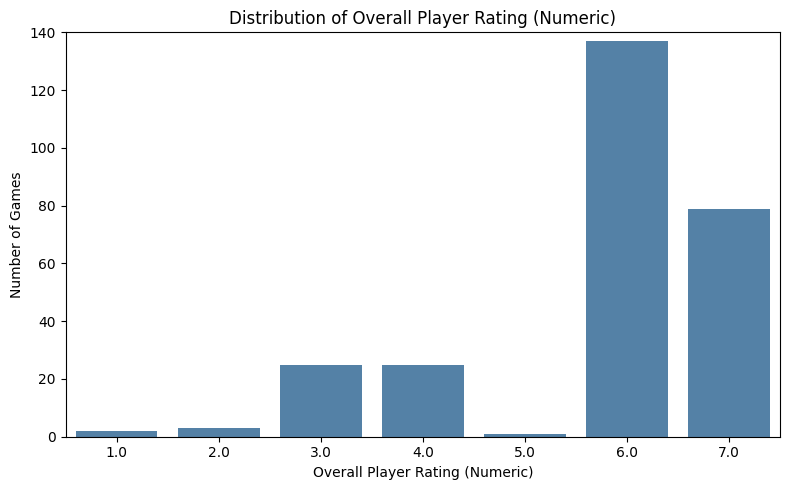

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(
    x="overall_player_rating_numeric",
    data=unique_game_df,
    color="steelblue",
    order=sorted(unique_game_df["overall_player_rating_numeric"].dropna().unique()),
)
plt.title("Distribution of Overall Player Rating (Numeric)")
plt.xlabel("Overall Player Rating (Numeric)")
plt.ylabel("Number of Games")
plt.ylim(0, 140)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


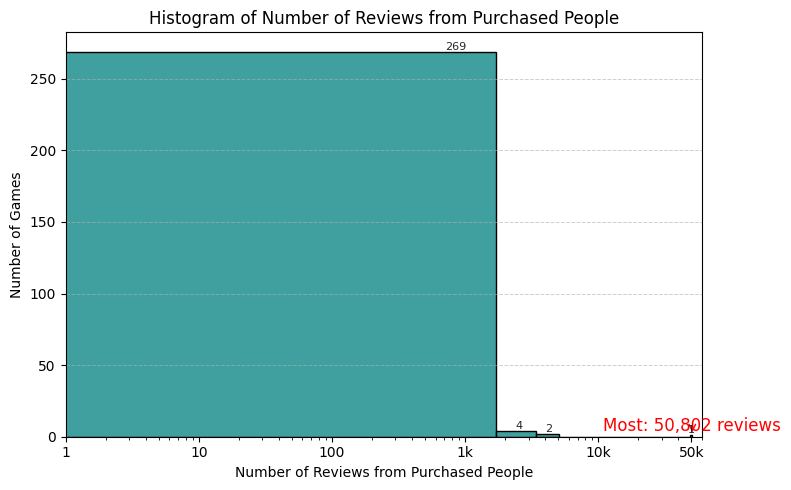

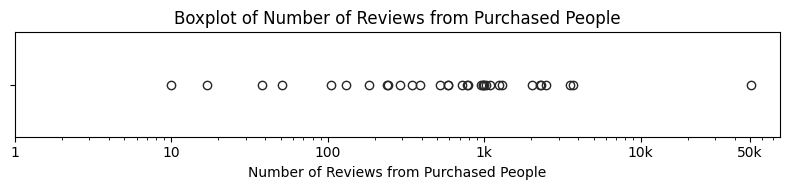

In [84]:
#2 Review and popularity by number_of_reviews_from_purchased_people:
plt.figure(figsize=(8,5))
sns.histplot(
    unique_game_df["number_of_reviews_from_purchased_people"].dropna(), 
    kde=False, 
    bins=30, 
    color="teal"
)
plt.title("Histogram of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.ylabel("Number of Games")
plt.tight_layout()
# Enhanced and more informative histogram

# Add grid for readability
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

# Use log scale for x-axis if there are large outliers (optional, comment if not desired)
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)

# Add annotation for max value (most reviewed game)
if not unique_game_df["number_of_reviews_from_purchased_people"].dropna().empty:
    max_val = unique_game_df["number_of_reviews_from_purchased_people"].max()
    count_max = (unique_game_df["number_of_reviews_from_purchased_people"] == max_val).sum()
    plt.annotate(
        f"Most: {int(max_val):,} reviews",
        xy=(max_val, count_max),
        xytext=(max_val, count_max+3),
        arrowprops=dict(arrowstyle="->", color="red"),
        color='red',
        fontsize=12,
        ha='center'
    )

# Add value labels on top of each bar (limited to avoid clutter for big bins)
for patch in plt.gca().patches:
    if patch.get_height() > 0:
        plt.gca().annotate(
            int(patch.get_height()),
            (patch.get_x() + patch.get_width() / 2, patch.get_height()),
            ha='center', va='bottom', fontsize=8, color='black', alpha=0.85
        )

# Alternative plot: Boxplot to show the distribution and outliers
plt.tight_layout()
plt.figure(figsize=(8,2))
sns.boxplot(
    x=unique_game_df["number_of_reviews_from_purchased_people"].dropna(),
    color="teal"
)
plt.title("Boxplot of Number of Reviews from Purchased People")
plt.xlabel("Number of Reviews from Purchased People")
plt.xscale('log')
plt.xticks(
    [1, 10, 100, 1000, 10000, 50000], 
    ['1', '10', '100', '1k', '10k', '50k']
)
plt.tight_layout()
plt.show()


In [85]:
#3 relation between quality and popularity: overall_player_rating_numeric vs. ספירת ביקורות
# Calculate the correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people
rating_col = "overall_player_rating_numeric"
reviews_col = "number_of_reviews_from_purchased_people"

# Only keep rows where both columns are not null
corr_df = unique_game_df[[rating_col, reviews_col]].dropna()

# Calculate and print correlation
if not corr_df.empty:
    correlation = corr_df[rating_col].corr(corr_df[reviews_col])
    print(f"Correlation between {rating_col} and {reviews_col}: {correlation:.3f}")
else:
    print("Not enough data to calculate correlation.")


Correlation between overall_player_rating_numeric and number_of_reviews_from_purchased_people: -0.010


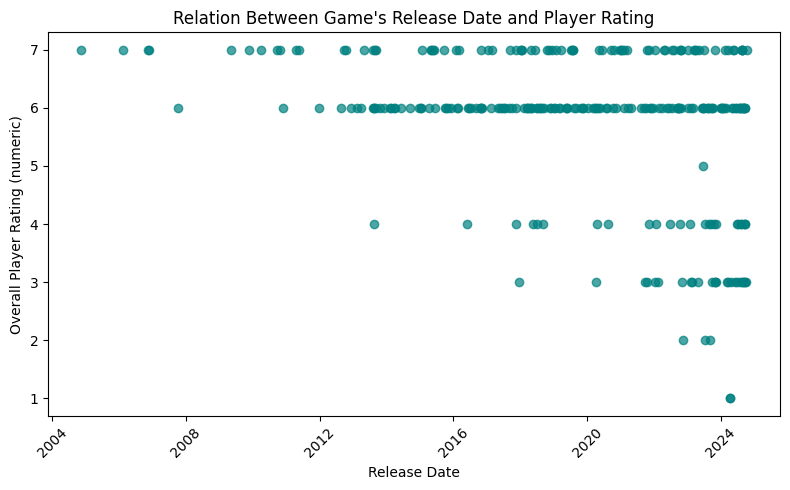

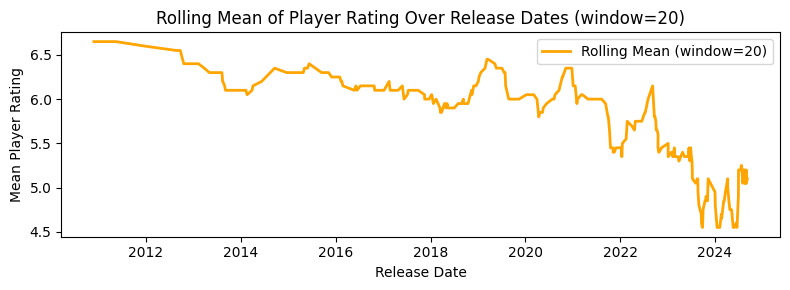

Correlation between game's release date and player rating: -0.373


In [86]:
#4 Time Trends:
# Analyze relation between game's release date and rating based on unique_game_df

# Ensure relevant columns are present and not null
time_rating_df = unique_game_df[["release_date", "overall_player_rating_numeric"]].dropna()

# Sort by release_date for plotting
time_rating_df = time_rating_df.sort_values("release_date")

# Plot scatter plot: Release date vs. Rating
plt.figure(figsize=(8, 5))
plt.scatter(
    time_rating_df["release_date"],
    time_rating_df["overall_player_rating_numeric"],
    alpha=0.7,
    color='teal'
)
plt.title("Relation Between Game's Release Date and Player Rating")
plt.xlabel("Release Date")
plt.ylabel("Overall Player Rating (numeric)")
plt.xticks(rotation=45)
plt.yticks([1,2,3,4,5,6,7])
plt.tight_layout()
plt.show()

# Optional: Plot rolling mean to show trend over time
window_size = 20  # or set to 10-50, depending on data size for smoothing
time_rating_df["rolling_mean"] = time_rating_df["overall_player_rating_numeric"].rolling(window=window_size, center=True).mean()

plt.figure(figsize=(8, 3))
plt.plot(
    time_rating_df["release_date"],
    time_rating_df["rolling_mean"],
    color="orange",
    linewidth=2,
    label=f"Rolling Mean (window={window_size})"
)
plt.title(f"Rolling Mean of Player Rating Over Release Dates (window={window_size})")
plt.xlabel("Release Date")
plt.ylabel("Mean Player Rating")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and print correlation
corr = time_rating_df["release_date"].map(lambda d: d.toordinal()).corr(time_rating_df["overall_player_rating_numeric"])
print(f"Correlation between game's release date and player rating: {corr:.3f}")



The overall quality of the games is maintained, there is a slight decrease in the average rating over time (may be biased becuase new game in the market did not aggregate a lot of reviews)

2. **ניתוח על בסיס genre מבוסס על final_df:**

Mean player rating in each genre (final_df):
normalized_genre
'adventure'          5.906355
'strategy'           5.899408
'rpg'                5.799087
'action'             5.752874
'simulation'         5.712062
'sports & racing'    5.405594
Name: overall_player_rating_numeric, dtype: float64


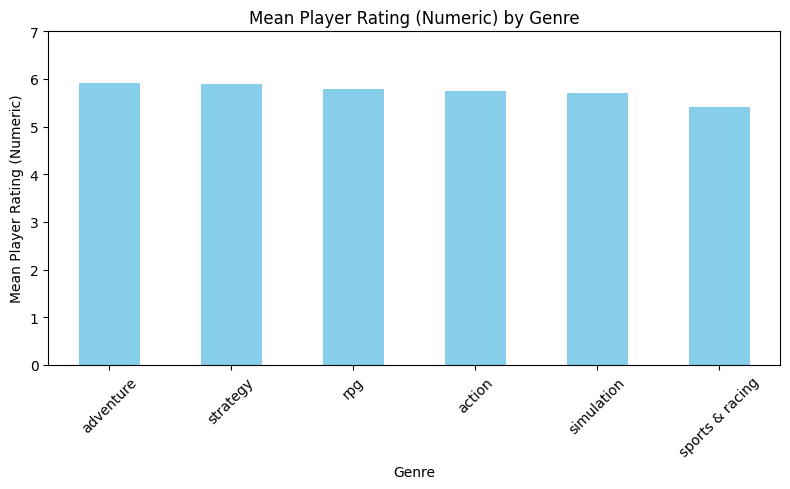

Mean player rating in each genre (final_df):
normalized_genre
adventure          5.906355
strategy           5.899408
rpg                5.799087
action             5.752874
simulation         5.712062
sports & racing    5.405594
Name: overall_player_rating_numeric, dtype: float64


In [87]:
#1 normalized_genre vs. overall_player_rating_numeric (Genre-based quality comparison):
import matplotlib.pyplot as plt

# Show the mean player rating (numeric) in each genre category (using normalized_genre)
genre_rating_mean = final_df.groupby("normalized_genre")["overall_player_rating_numeric"].mean().sort_values(ascending=False)
print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)
# Remove " from genres names in the index - for pretty printing

genre_rating_mean.index = genre_rating_mean.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_rating_mean.plot(kind='bar', color='skyblue')
plt.title("Mean Player Rating (Numeric) by Genre")
plt.xlabel("Genre")
plt.ylabel("Mean Player Rating (Numeric)")
plt.ylim(0, 7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Mean player rating in each genre (final_df):")
print(genre_rating_mean)


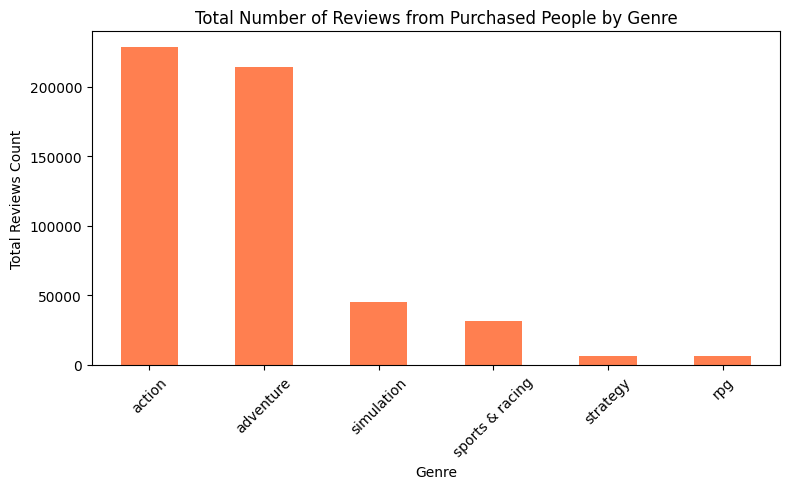

Total number of reviews (from purchased people) in each genre (final_df):
normalized_genre
action             228284
adventure          214423
simulation          45040
sports & racing     31333
strategy             6689
rpg                  6397
Name: number_of_reviews_from_purchased_people, dtype: object


In [88]:
# 2 Genre-popularity comparison: normalized_genre vs. total count of reviews:
# Show the total number of reviews by genre (using final_df)
genre_review_sum = final_df.groupby("normalized_genre")["number_of_reviews_from_purchased_people"].sum().sort_values(ascending=False)
# Remove quotes for nice labeling
genre_review_sum.index = genre_review_sum.index.str.replace("'", "").str.strip()
plt.figure(figsize=(8,5))
genre_review_sum.plot(kind='bar', color='coral')
plt.title("Total Number of Reviews from Purchased People by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Reviews Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Total number of reviews (from purchased people) in each genre (final_df):")
print(genre_review_sum)


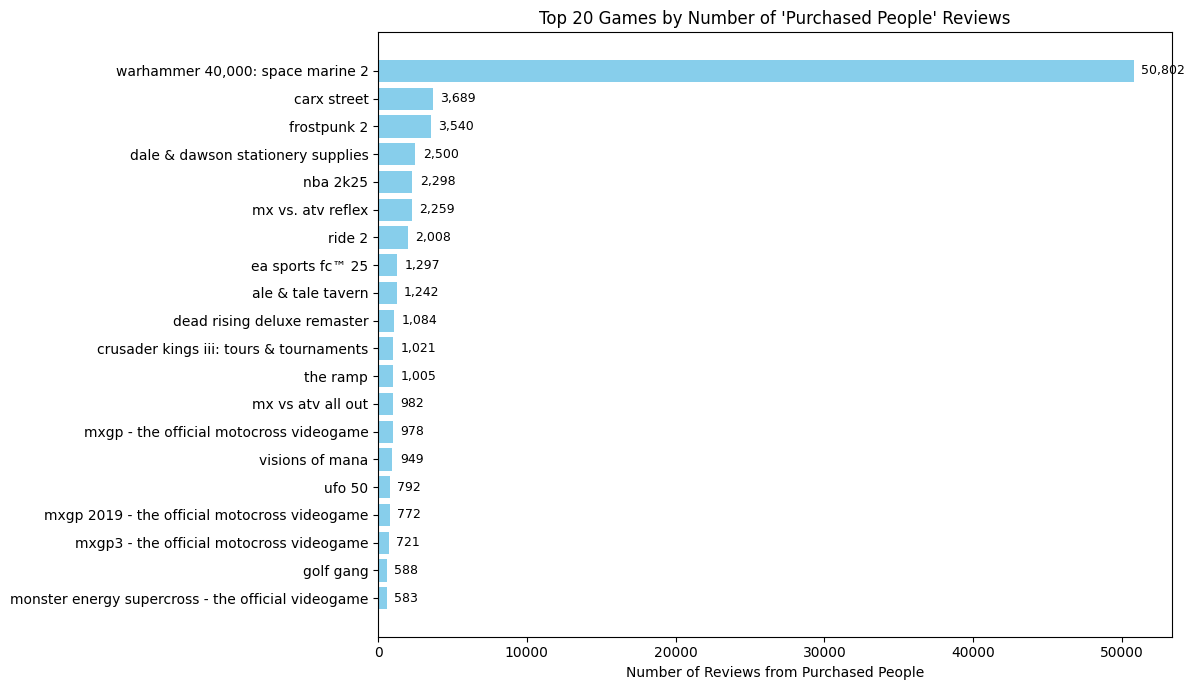

Top 20 games by the number of player reviews from people who purchased the game:
                                            game_name            genre  \
0                    warhammer 40,000: space marine 2           Action   
1                                         carx street       Simulation   
2                                         frostpunk 2       Simulation   
3                   dale & dawson stationery supplies     Role-Playing   
4                                            nba 2k25       Simulation   
5                                   mx vs. atv reflex  Sports & Racing   
6                                              ride 2  Sports & Racing   
7                                    ea sports fc™ 25       Simulation   
8                                   ale & tale tavern       Simulation   
9                         dead rising deluxe remaster           Action   
10            crusader kings iii: tours & tournaments       Simulation   
11                             

In [89]:
# Visualize the Top 20 Games by "number_of_reviews_from_purchased_people"

# Get a unique table of games. If unique_df exists (unique games), prefer it; otherwise, drop duplicates in final_df.
try:
    top_games_df = unique_df.copy()
except NameError:
    top_games_df = final_df.drop_duplicates(subset=['game_name']).copy()

# Ensure 'number_of_reviews_from_purchased_people' is numeric, coercing errors to NaN and filling with 0
top_games_df['number_of_reviews_from_purchased_people'] = pd.to_numeric(
    top_games_df['number_of_reviews_from_purchased_people'], errors='coerce'
).fillna(0).astype(int)

# Get the top 20 games by number of purchased reviews
top20_games = top_games_df.sort_values(
    'number_of_reviews_from_purchased_people', ascending=False
).head(20)

plt.figure(figsize=(12,7))
bars = plt.barh(
    top20_games['game_name'],
    top20_games['number_of_reviews_from_purchased_people'],
    color='skyblue'
)
plt.xlabel("Number of Reviews from Purchased People")
plt.title("Top 20 Games by Number of 'Purchased People' Reviews")
plt.gca().invert_yaxis()  # Highest at the top
for i, v in enumerate(top20_games['number_of_reviews_from_purchased_people']):
    plt.text(v + max(top20_games['number_of_reviews_from_purchased_people']) * 0.01, i, f"{v:,}", va='center', fontsize=9)
plt.tight_layout()
plt.show()

print("Top 20 games by the number of player reviews from people who purchased the game:")
print(top20_games[['game_name', 'genre', 'number_of_reviews_from_purchased_people']].reset_index(drop=True))


In [90]:
# For each of the 6 main genres, display the top 10 (rank 1 is best) game names for rank_type == "Revenue"

main_genres = ['Action', 'Adventure', 'Role-Playing', 'Simulation', 'Strategy', 'Sports & Racing']

top10_games_by_genre = {}

for genre in main_genres:
    df_genre = final_df[(final_df['rank_type'] == 'Revenue') & (final_df['genre'] == genre)].copy()
    df_genre['rank'] = pd.to_numeric(df_genre['rank'], errors='coerce')
    top10 = df_genre.nsmallest(10, 'rank')[['rank', 'game_name']].sort_values('rank')
    top10_games_by_genre[genre] = top10

for genre in main_genres:
    print(f"\nTop 10 Games for Genre '{genre}' by Revenue Rank:")
    print(top10_games_by_genre[genre].reset_index(drop=True))
# Explanation for: "why every game for each genre shows more than one time?"

explanation_duplicates = """
You may notice that the same game appears more than once for a given genre when listing the top games.
This happens because the original DataFrame (`final_df`) can contain multiple rows for the same `game_name`.
This duplication occurs for several reasons:
- The dataset combines rankings for different metrics (`rank_type` like 'Sales' and 'Revenue'); some games appear with both types.
- Some games may appear multiple times if they fit multiple sub-genres or have slightly different metadata entries.
- If the DataFrame is not explicitly de-duplicated per game before selecting the top N, any row with the matching genre and rank_type can be included.

To see only unique games in each genre's top 10, you can drop duplicates by the 'game_name' column after filtering and before displaying. 
For example, add `.drop_duplicates(subset=['game_name'])` before displaying:

    top10 = df_genre.nsmallest(10, 'rank').drop_duplicates(subset=['game_name'])[['rank', 'game_name']].sort_values('rank')

This ensures each game appears only once in the top 10 list per genre.
"""

print(explanation_duplicates)
# Drop duplicate game names for each genre's top 10 by keeping the first occurrence
for genre in main_genres:
    top10_games_by_genre[genre] = top10_games_by_genre[genre].drop_duplicates(subset=['game_name']).reset_index(drop=True)



Top 10 Games for Genre 'Action' by Revenue Rank:
   rank                         game_name
0     1  warhammer 40,000: space marine 2
1     1  warhammer 40,000: space marine 2
2     2                black myth: wukong
3     2                black myth: wukong
4     2                black myth: wukong
5     3                  counter-strike 2
6     3                  counter-strike 2
7     4                        elden ring
8     4                        elden ring
9     5               pubg: battlegrounds

Top 10 Games for Genre 'Adventure' by Revenue Rank:
   rank                         game_name
0     1  warhammer 40,000: space marine 2
1     1  warhammer 40,000: space marine 2
2     2                black myth: wukong
3     2                black myth: wukong
4     2                black myth: wukong
5     3                   baldur's gate 3
6     3                   baldur's gate 3
7     4                      satisfactory
8     4                      satisfactory
9     4        

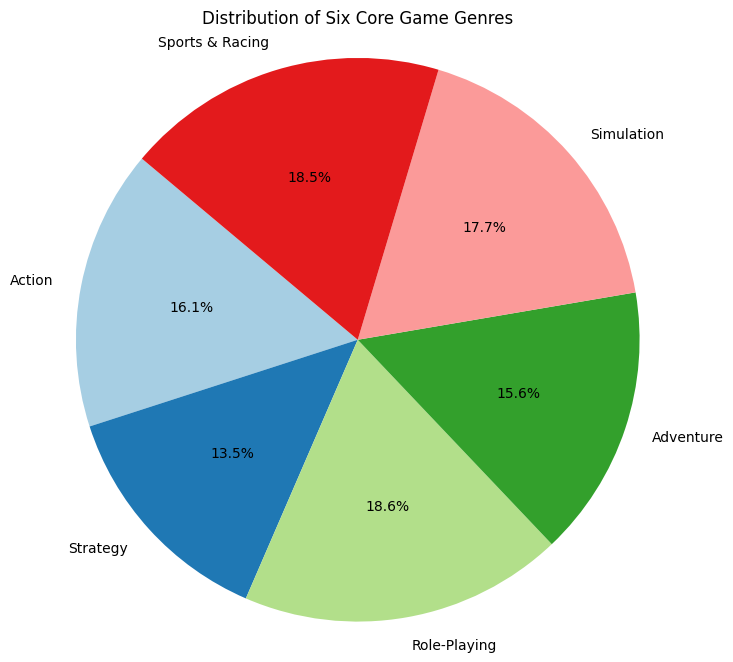

In [91]:
# Pie chart for distribution of six core genres in the dataset

import matplotlib.pyplot as plt

# Count occurrences of each genre (use the main normalized genre column with 6 genres)
genre_counts = final_df['genre'].value_counts().loc[
    ['Action', 'Strategy', 'Role-Playing', 'Adventure', 'Simulation', 'Sports & Racing']
]

plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Six Core Game Genres')
plt.axis('equal')
plt.show()



# -  -  -  - 

## **KPI 1 - Sustainable Game Success Index (SGSI):**

**Evaluation of business performance quality of leading games in every genre on Steam using ratings (Revenue, Sales, Reviews) as a proxy for business performance**

### **Top Games Performance Index (TGPI):**
A composite index that represents how leading games in the genre perform in terms of business results and user approval – relatively within the genre.

In [92]:
# Converting each rank type to score:
# 1 - Splitting the rank type into 3 its metrics:
rank_wide = final_df.pivot_table(
    index = ['game_name', 'normalized_genre'],
    columns = 'rank_type',
    values = 'rank',
    aggfunc = 'min' #since this data set is with duplicates, it should take the minimal value (= best rank)
                    # For assessing potential and performance in leading games
).reset_index()

rank_wide = rank_wide.rename(columns={'Revenue':'rank_revenue', 'Sales':'rank_sales', 'Review':'rank_review'})

rank_wide.columns.name = None
rank_wide.index.name = None
rank_wide['normalized_genre'] = rank_wide['normalized_genre'].str.replace("'","")

In [93]:
#2 Scale reversal - high score = better:
max_rank = 40

for col in ['rank_revenue','rank_sales','rank_review']:
    rank_wide[f"score_{col.split('_')[1]}"] = np.where(    #switching from "rank" to "score" 
        rank_wide[col].notna(),
        (max_rank + 1) - rank_wide[col],
        np.nan
        )
print('After scale reversal = now best score is the highest score --> the higher, the better')

After scale reversal = now best score is the highest score --> the higher, the better


In [94]:
rank_wide

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,score_revenue,score_sales,score_review
0,69 balls,action,NaN,11.0,NaN,NaN,NaN,30.0
1,69 balls,simulation,NaN,11.0,NaN,NaN,NaN,30.0
2,69 balls,sports & racing,NaN,11.0,NaN,NaN,NaN,30.0
3,7 days to die,action,40.0,16.0,NaN,1.0,NaN,25.0
4,7 days to die,simulation,40.0,16.0,NaN,1.0,NaN,25.0
...,...,...,...,...,...,...,...,...
583,yakuza 0,action,NaN,37.0,NaN,NaN,NaN,4.0
584,yakuza 0,adventure,NaN,37.0,NaN,NaN,NaN,4.0
585,yakuza 0,rpg,NaN,37.0,NaN,NaN,NaN,4.0
586,yu-gi-oh! master duel,simulation,9.0,NaN,11.0,32.0,30.0,NaN


In [95]:
#3 Filtering the Top Games: for Top 10 games for each genre,according to the steam original data - aka the rank:
# Getting a quality picture of the 'showcase' of the genre: 
# for this buissnes objective, the top 10 games will be according to revenue_rank:
top_10 = (rank_wide.dropna(subset=['rank_revenue'])
.sort_values(['normalized_genre', 'rank_revenue'])
.groupby('normalized_genre')
.head(10)
.reset_index(drop=True)
)
top_10

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,score_revenue,score_sales,score_review
0,"warhammer 40,000: space marine 2",action,1.0,NaN,1.0,40.0,40.0,NaN
1,black myth: wukong,action,2.0,3.0,2.0,39.0,39.0,38.0
2,total war: warhammer iii,action,2.0,NaN,4.0,39.0,37.0,NaN
3,counter-strike 2,action,3.0,1.0,1.0,38.0,40.0,40.0
4,dota 2,action,3.0,1.0,3.0,38.0,38.0,40.0
5,once human,action,3.0,NaN,4.0,38.0,37.0,NaN
6,elden ring,action,4.0,6.0,3.0,37.0,38.0,35.0
7,cyberpunk 2077,action,5.0,9.0,1.0,36.0,40.0,32.0
8,pubg: battlegrounds,action,5.0,NaN,6.0,36.0,35.0,NaN
9,war thunder,action,5.0,NaN,9.0,36.0,32.0,NaN


### **Top Games Prefoemance Index - TGPI (Top 10 Games):**
A composite metric combining revenue, sales, and player reviews to evaluate top-performing games within each genre.

In [96]:
#the calculations are based on the score - the higer the better:
weights = {
    "score_revenue":0.4,
    "score_sales":0.3,
    "score_review":0.3
}

def calc_tgpi(row):
    total, w_sum = 0, 0
    for col, w in weights.items():
        if pd.notna(row[col]):
            total += row[col] * w
            w_sum += w
    return total/w_sum if w_sum > 0 else None

top_10['TGPI'] = top_10.apply(calc_tgpi, axis =1)
    
top_10[['game_name','normalized_genre', 'TGPI']].round(2)

,game_name,normalized_genre,TGPI
0,"warhammer 40,000: space marine 2",action,40.00
1,black myth: wukong,action,38.70
2,total war: warhammer iii,action,38.14
3,counter-strike 2,action,39.20
4,dota 2,action,38.60
5,once human,action,37.57
6,elden ring,action,36.70
7,cyberpunk 2077,action,36.00
8,pubg: battlegrounds,action,35.57
9,war thunder,action,34.29


In [97]:
#aggregation to be per genre and not per specific game:
genre_kpi = (top_10.groupby('normalized_genre')['TGPI']
.agg(
    avg_tgpi = 'mean',
    std_tgpi = 'std',
    n_games = 'count')
.reset_index()
.sort_values('avg_tgpi', ascending = False)
)

genre_kpi.round(2)

,normalized_genre,avg_tgpi,std_tgpi,n_games
0,action,37.48,1.80,10
3,simulation,34.94,4.10,10
5,strategy,34.70,3.86,10
1,adventure,34.64,4.68,10
2,rpg,33.95,4.77,10
4,sports & racing,33.65,3.76,10


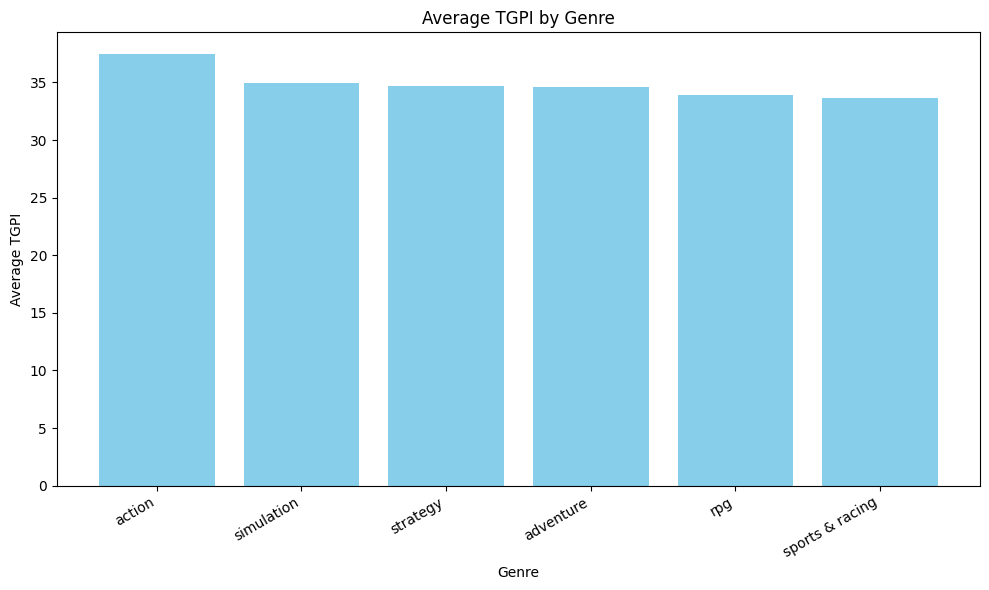

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(genre_kpi['normalized_genre'], genre_kpi['avg_tgpi'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Average TGPI')
plt.title('Average TGPI by Genre')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()





Action leads in average TGPI, while other genres display relatively close performance levels

**Scatter plot of Average TGPI vs Risk (STD) + Quadrants (חלוקה לרבעים)**

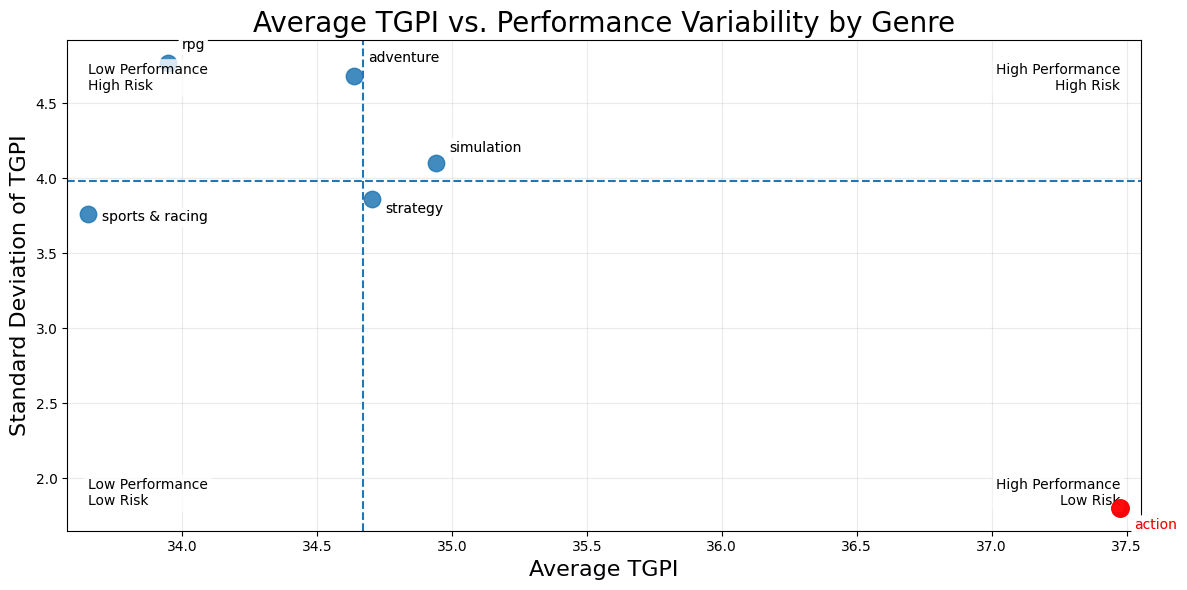

In [99]:
import matplotlib.pyplot as plt

x_col = 'avg_tgpi'
y_col = 'std_tgpi'
label_col = 'normalized_genre'

x_med = genre_kpi[x_col].median()
y_med = genre_kpi[y_col].median()

plt.figure(figsize=(12, 6))
plt.scatter(genre_kpi[x_col], genre_kpi[y_col], s=140, alpha=0.85)

# קווי חלוקה (quadrants)
plt.axvline(x_med, linestyle='--')
plt.axhline(y_med, linestyle='--')

# הסטות ידניות לתוויות כדי למנוע חפיפה
offsets = {
    'action': (10, -15),
    'simulation': (10, 8),
    'strategy': (10, -10),
    'adventure': (10, 10),
    'rpg': (10, 10),
    'sports & racing': (10, -5),
}

for _, r in genre_kpi.iterrows():
    dx, dy = offsets.get(r[label_col], (8, 8))
    plt.annotate(
        r[label_col],
        (r[x_col], r[y_col]),
        textcoords="offset points",
        xytext=(dx, dy),
        ha='left',
        fontsize=10,
        bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='none')
    )

# טקסט quadrants – בפינות, עם רקע לבן
pad_x = (genre_kpi[x_col].max() - genre_kpi[x_col].min()) * 0.02
pad_y = (genre_kpi[y_col].max() - genre_kpi[y_col].min()) * 0.05

xmin, xmax = genre_kpi[x_col].min() - pad_x, genre_kpi[x_col].max() + pad_x
ymin, ymax = genre_kpi[y_col].min() - pad_y, genre_kpi[y_col].max() + pad_y
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

kw = dict(fontsize=10, bbox=dict(boxstyle='round,pad=0.25', fc='white', alpha=0.8, ec='none'))
plt.text(xmin + pad_x, ymax - pad_y, "Low Performance\nHigh Risk", va='top', **kw)
plt.text(xmin + pad_x, ymin + pad_y, "Low Performance\nLow Risk", va='bottom', **kw)
plt.text(xmax - pad_x, ymax - pad_y, "High Performance\nHigh Risk", va='top', ha='right', **kw)
plt.text(xmax - pad_x, ymin + pad_y, "High Performance\nLow Risk", va='bottom', ha='right', **kw)

plt.title("Average TGPI vs. Performance Variability by Genre")
plt.xlabel("Average TGPI")
plt.ylabel("Standard Deviation of TGPI")
plt.grid(True, alpha=0.25)
# Highlight the "action" label and its point in red
for _, r in genre_kpi.iterrows():
    dx, dy = offsets.get(r[label_col], (8, 8))
    if r[label_col] == 'action':
        plt.annotate(
            r[label_col],
            (r[x_col], r[y_col]),
            textcoords="offset points",
            xytext=(dx, dy),
            ha='left',
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='none'),
            color='red'
        )
        plt.scatter(r[x_col], r[y_col], s=160, alpha=0.95, color='red', edgecolor='red', zorder=10)
    else:
        plt.annotate(
            r[label_col],
            (r[x_col], r[y_col]),
            textcoords="offset points",
            xytext=(dx, dy),
            ha='left',
            fontsize=10,
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.8, ec='none')
        )
plt.title("Average TGPI vs. Performance Variability by Genre", fontsize=20)
plt.xlabel("Average TGPI", fontsize=16)
plt.ylabel("Standard Deviation of TGPI", fontsize=16)
plt.tight_layout()
plt.show(block=False)


While most genres demonstrate similar average performance accompanied by higher variability, Action clearly stands out as a high-performing and consistent genre

 ### **Consistency:** 
 besides average performance (Average TGPI), it's interesting to know:
How consistent success in the genre is and whether it doesn't depend on a single game

Consistency reflects how predictable success is within a genre

In [100]:
genre_kpi['consistency_score'] = (genre_kpi['avg_tgpi']/genre_kpi['std_tgpi'])

genre_kpi.sort_values('consistency_score', ascending=False)

,normalized_genre,avg_tgpi,std_tgpi,n_games,consistency_score
0,action,37.477143,1.799511,10,20.826291
5,strategy,34.702857,3.861114,10,8.987784
4,sports & racing,33.651429,3.760188,10,8.949401
3,simulation,34.940000,4.100040,10,8.521867
1,adventure,34.637143,4.681353,10,7.398960
2,rpg,33.947143,4.771643,10,7.114351


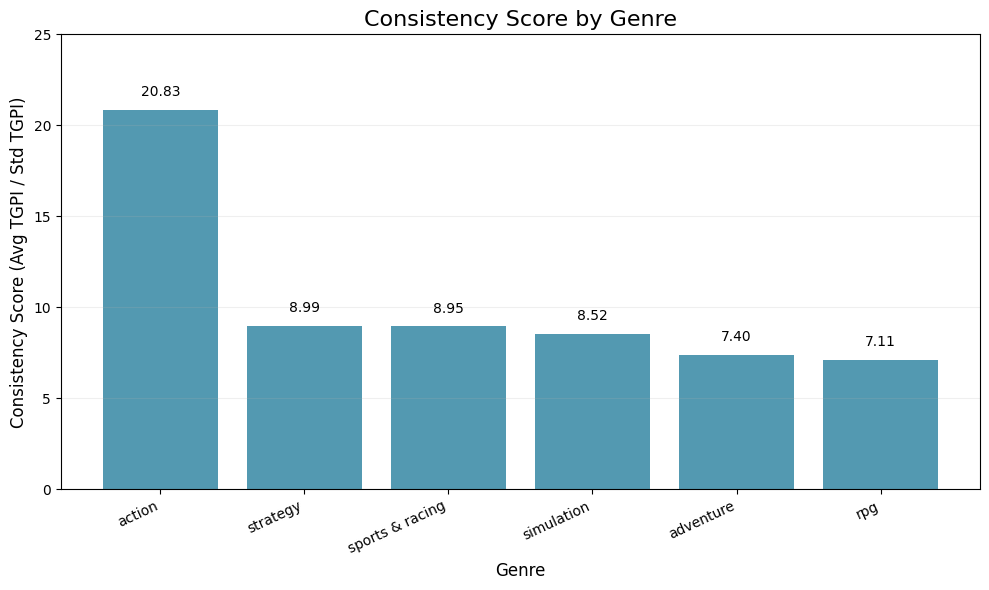

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sorted_genre_kpi = genre_kpi.sort_values('consistency_score', ascending=False)
bars = plt.bar(
    sorted_genre_kpi['normalized_genre'], 
    sorted_genre_kpi['consistency_score'], 
    color='#3587A4', 
    alpha=0.85
)
plt.title("Consistency Score by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Consistency Score (Avg TGPI / Std TGPI)", fontsize=12)
plt.xticks(rotation=25, ha='right')
plt.ylim(0, 25)
plt.grid(axis='y', alpha=0.2)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.6, f"{yval:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()



While Average TGPI reflects overall performance, the Consistency Score highlights the stability of success within each genre.
Genres with higher consistency scores demonstrate more predictable outcomes, whereas lower scores indicate greater performance volatility

### **Beyond ranking: Player Experiance & Engagment:**

### **Player Satisfaction vs Monetization:** (שביעות רצון מול מונטיזציה):
Are games that make good money also loved by players, or is there a difference between money and user experience?

Monetizaion = how game produce money? How successful is the game at turning players into revenue? 

When designing a new game, should we prioritize monetization strategies, player experience, or a balance between the two?

Monetization strength is approximated using revenue-based rankings.

Player satisfaction is measured using the overall player rating, reflecting user experience quality



In [102]:
# Converting each rank type to score:
# 1 - Splitting the rank type into 3 its metrics:
rank_pivot_df = unique_game_df.pivot_table(
    index=['game_name','normalized_genre'],
    columns='rank_type',
    values='rank',
    aggfunc='min'
).reset_index()

rank_pivot_df = rank_pivot_df.rename(columns={
    'Revenue': 'rank_revenue',
    'Sales': 'rank_sales',
    'Review': 'rank_review'
})
rank_pivot_df['normalized_genre'] = rank_pivot_df['normalized_genre'].str.replace("'","")

In [103]:
rank_pivot_df

rank_type,game_name,normalized_genre,rank_revenue,rank_review,rank_sales
0,69 balls,sports & racing,NaN,11.0,NaN
1,7 days to die,simulation,40.0,NaN,NaN
2,age of empires ii (retired),action,NaN,19.0,NaN
3,age of empires ii: definitive edition,action,36.0,NaN,NaN
4,age of wonders 4,rpg,NaN,36.0,NaN
...,...,...,...,...,...
271,world of warships,action,NaN,NaN,29.0
272,wrestling empire,simulation,NaN,27.0,NaN
273,wwe 2k24,simulation,NaN,NaN,13.0
274,yakuza 0,action,NaN,37.0,NaN


In [104]:
# merge the column overall_player_rating_numeric:
kpi3_df = rank_pivot_df.merge(
    unique_game_df[['game_name', 'overall_player_rating_numeric']],
    on='game_name',
    how='left')

In [105]:
kpi3_df

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,overall_player_rating_numeric
0,69 balls,sports & racing,NaN,11.0,NaN,6.0
1,7 days to die,simulation,40.0,NaN,NaN,6.0
2,age of empires ii (retired),action,NaN,19.0,NaN,7.0
3,age of empires ii: definitive edition,action,36.0,NaN,NaN,6.0
4,age of wonders 4,rpg,NaN,36.0,NaN,6.0
...,...,...,...,...,...,...
271,world of warships,action,NaN,NaN,29.0,4.0
272,wrestling empire,simulation,NaN,27.0,NaN,7.0
273,wwe 2k24,simulation,NaN,NaN,13.0,4.0
274,yakuza 0,action,NaN,37.0,NaN,7.0


In [106]:
# defining monetization:
# Scale reversal - high score = better:
kpi3_df['monetization_score'] = (
    41 - kpi3_df['rank_revenue']
)
print('After scale revesal, now higher score is better, the higher - the better')

After scale revesal, now higher score is better, the higher - the better


In [107]:
kpi3_df

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,overall_player_rating_numeric,monetization_score
0,69 balls,sports & racing,NaN,11.0,NaN,6.0,NaN
1,7 days to die,simulation,40.0,NaN,NaN,6.0,1.0
2,age of empires ii (retired),action,NaN,19.0,NaN,7.0,NaN
3,age of empires ii: definitive edition,action,36.0,NaN,NaN,6.0,5.0
4,age of wonders 4,rpg,NaN,36.0,NaN,6.0,NaN
...,...,...,...,...,...,...,...
271,world of warships,action,NaN,NaN,29.0,4.0,NaN
272,wrestling empire,simulation,NaN,27.0,NaN,7.0,NaN
273,wwe 2k24,simulation,NaN,NaN,13.0,4.0,NaN
274,yakuza 0,action,NaN,37.0,NaN,7.0,NaN


In [108]:
#for comapring between the monetization score and overall player rating numeric it is 
# important that only games with data for both of these paramteres will remain:
kpi3_clean = kpi3_df[kpi3_df['monetization_score'].notna() & 
kpi3_df['overall_player_rating_numeric'].notna()]

kpi3_clean

,game_name,normalized_genre,rank_revenue,rank_review,rank_sales,overall_player_rating_numeric,monetization_score
1,7 days to die,simulation,40.0,NaN,NaN,6.0,1.0
3,age of empires ii: definitive edition,action,36.0,NaN,NaN,6.0,5.0
6,ale & tale tavern,simulation,39.0,NaN,NaN,6.0,2.0
10,all-in-one sports vr,sports & racing,11.0,NaN,NaN,6.0,30.0
15,ark: survival ascended,adventure,29.0,NaN,NaN,3.0,12.0
23,balatro,strategy,35.0,NaN,NaN,7.0,6.0
27,black desert,rpg,37.0,NaN,NaN,4.0,4.0
32,call of duty®: black ops ii,adventure,39.0,NaN,NaN,6.0,2.0
38,carx street,simulation,32.0,NaN,NaN,3.0,9.0
39,chained together,adventure,22.0,NaN,NaN,6.0,19.0


In [109]:
#Sanity check:
kpi3_clean[['monetization_score','overall_player_rating_numeric']].describe()

,monetization_score,overall_player_rating_numeric
count,48.000000,48.00000
mean,9.062500,5.75000
std,6.475506,1.12041
min,1.000000,3.00000
25%,4.000000,6.00000
50%,8.000000,6.00000
75%,12.250000,6.00000
max,30.000000,7.00000


**Scatter plot of monetization vs player satisfaction (aka overll player rating numeric):**

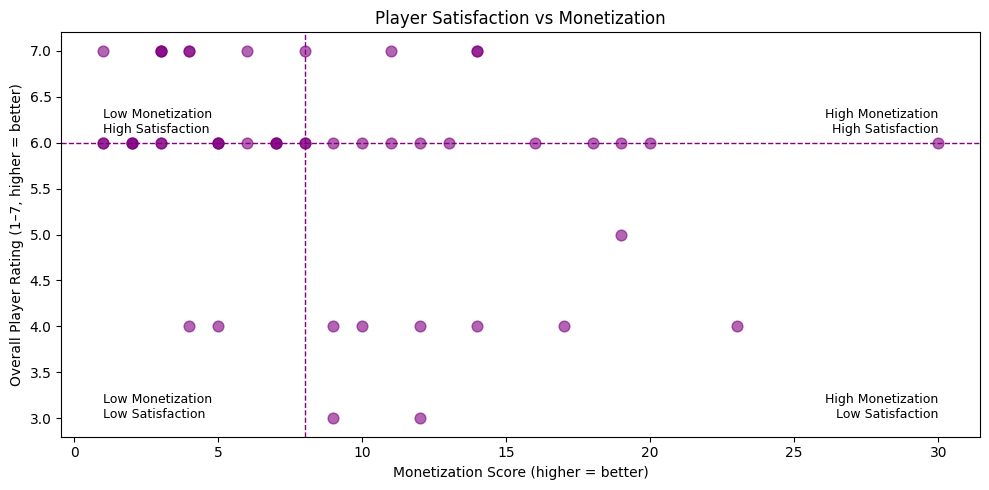

Darker areas indicate a higher concentration of games with similar monetization and player satisfaction levels


In [110]:
import matplotlib.pyplot as plt

# חישוב חציון לצירים
x_median = kpi3_clean['monetization_score'].median()
y_median = kpi3_clean['overall_player_rating_numeric'].median()

plt.figure(figsize=(10, 5))

# Scatter עם רמיזה להצטברות
plt.scatter(
    kpi3_clean['monetization_score'],
    kpi3_clean['overall_player_rating_numeric'],
    alpha=0.6,   # ← רמיזה להצטברות
    s=60
)

# קווי חציון
plt.axvline(x=x_median, linestyle='--', linewidth=1)
plt.axhline(y=y_median, linestyle='--', linewidth=1)

# כותרות וצירים
plt.title('Player Satisfaction vs Monetization')
plt.xlabel('Monetization Score (higher = better)')
plt.ylabel('Overall Player Rating (1–7, higher = better)')

# תוויות רבעים (ממוקמות בצדדים)
plt.text(
    kpi3_clean['monetization_score'].min(),
    y_median + 0.1,
    'Low Monetization\nHigh Satisfaction',
    fontsize=9,
    ha='left'
)

plt.text(
    kpi3_clean['monetization_score'].max(),
    y_median + 0.1,
    'High Monetization\nHigh Satisfaction',
    fontsize=9,
    ha='right'
)

plt.text(
    kpi3_clean['monetization_score'].min(),
    kpi3_clean['overall_player_rating_numeric'].min(),
    'Low Monetization\nLow Satisfaction',
    fontsize=9,
    ha='left'
)

plt.text(
    kpi3_clean['monetization_score'].max(),
    kpi3_clean['overall_player_rating_numeric'].min(),
    'High Monetization\nLow Satisfaction',
    fontsize=9,
    ha='right'
)

plt.tight_layout()

# Change all dots and lines to purple
for line in plt.gca().lines:
    line.set_color('purple')  # Change lines to purple

for pathcoll in plt.gca().collections:
    pathcoll.set_facecolor('purple')  # Change marker (dot) color to purple

plt.show()

print('Darker areas indicate a higher concentration of games with similar monetization and player satisfaction levels')

In [111]:
#Quadrant Threshold Calculation:
monetization_cutoff = kpi3_clean['monetization_score'].median()
satisfaction_cutoff = kpi3_clean['overall_player_rating_numeric'].median()

In [112]:
#Assigning each game to it is quadrant:
def assign_quadrant(row):
    if row['monetization_score'] >= monetization_cutoff and row['overall_player_rating_numeric'] >= satisfaction_cutoff:
        return 'High Monetization | High Satisfaction'
    elif row['monetization_score'] < monetization_cutoff and row['overall_player_rating_numeric'] >= satisfaction_cutoff:
        return 'Low Monetization | High Satisfaction'
    elif row['monetization_score'] >= monetization_cutoff and row['overall_player_rating_numeric'] < satisfaction_cutoff:
        return 'High Monetization | Low Satisfaction'
    else:
        return 'Low Monetization | Low Satisfaction'

kpi3_clean.loc[:,'quadrant'] = kpi3_clean.apply(assign_quadrant, axis=1)

C:\Users\boris\AppData\Local\Temp\ipykernel_32816\4168491930.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kpi3_clean.loc[:,'quadrant'] = kpi3_clean.apply(assign_quadrant, axis=1)


In [113]:
quadrant_summary = (
    kpi3_clean
    .groupby('quadrant')
    .size()
    .reset_index(name='n_games')
)

# 2. חישוב סך כל המשחקים
total_games = quadrant_summary['n_games'].sum()

# 3. חישוב אחוז מכלל המשחקים
quadrant_summary['percent_of_games'] = (
    quadrant_summary['n_games'] / total_games * 100
).round(1)

quadrant_summary

,quadrant,n_games,percent_of_games
0,High Monetization | High Satisfaction,16,33.3
1,High Monetization | Low Satisfaction,9,18.8
2,Low Monetization | High Satisfaction,21,43.8
3,Low Monetization | Low Satisfaction,2,4.2


In [114]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(
    kpi3_clean['monetization_score'],
    kpi3_clean['overall_player_rating_numeric']
)

corr.round(2), p_value.round(2)


(np.float64(-0.32), np.float64(0.03))

A weak but statistically significant negative correlation (Spearman r = −0.32, p = 0.03) was found between monetization and player satisfaction, suggesting that higher monetization does not necessarily translate into a better player experience.

p value = 0.03 < 0.05 --> Statistical significance 

Meaning higher monetization strategies may come at the expense of player satisfaction, highlighting the need for balanced design decisions

## **KPI 2 - Games Released per Year:**

This KPI focuses on how frequently new games enter the market each year.
It helps frame the broader context of growth, saturation, and competition before examining performance outcomes.

**Bar chart of the number of games released per year:**

release_year
2004     1
2006     3
2007     1
2009     2
2010     4
2011     3
2012     4
2013    13
2014     7
2015    14
2016    14
2017    15
2018    26
2019    18
2020    18
2021    18
2022    26
2023    37
2024    52
Name: count, dtype: int64


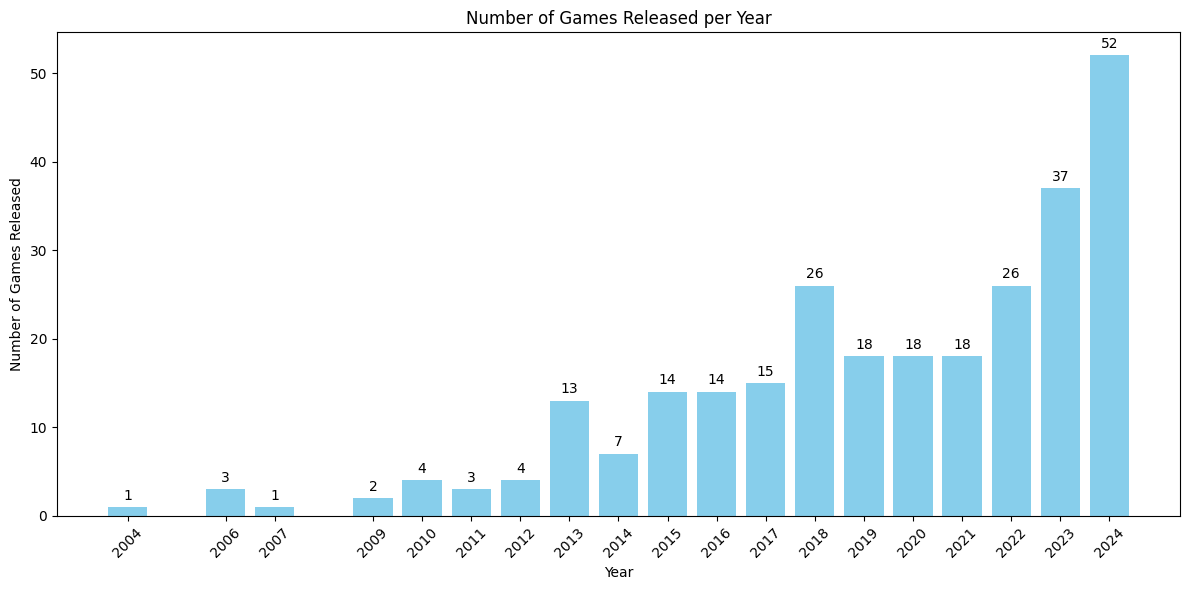


The bar chart above shows the number of new game releases per year on Steam. This visualization highlights trends in how many unique games entered the market annually, making it easy to spot years with significant increases or decreases in new releases and observe overall industry growth or slowdowns.


In [115]:
# Calculate number of games released per year (KPI: Games per Year)

# Assuming unique_df is the DataFrame with each row a unique game and 'release_date' is datetime
# If release_date is not datetime, convert it
if unique_game_df['release_date'].dtype != 'datetime64[ns]':
    unique_game_df['release_date'] = pd.to_datetime(unique_game_df['release_date'], errors='coerce')

# Extract year and drop NaT
unique_game_df['release_year'] = unique_game_df['release_date'].dt.year

# Count games per year
games_per_year = unique_game_df['release_year'].value_counts().sort_index()

print(games_per_year)

plt.figure(figsize=(12,6))
bars = plt.bar(games_per_year.index, games_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Year')
plt.xticks(games_per_year.index, rotation=45)
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )

plt.show()

print("\nThe bar chart above shows the number of new game releases per year on Steam. This visualization highlights trends in how many unique games entered the market annually, making it easy to spot years with significant increases or decreases in new releases and observe overall industry growth or slowdowns.")



**Game Distribution by Percentage and Numbers:**

normalized_genre,'action','adventure','rpg','simulation','sports & racing','strategy'
release_year,,,,,,
2004,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006,33.333333,0.000000,0.000000,66.666667,0.000000,0.000000
2007,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2009,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000
2010,0.000000,0.000000,50.000000,0.000000,25.000000,25.000000
2011,33.333333,33.333333,33.333333,0.000000,0.000000,0.000000
2012,50.000000,25.000000,0.000000,25.000000,0.000000,0.000000
2013,46.153846,0.000000,7.692308,30.769231,0.000000,15.384615
2014,14.285714,14.285714,28.571429,28.571429,14.285714,0.000000


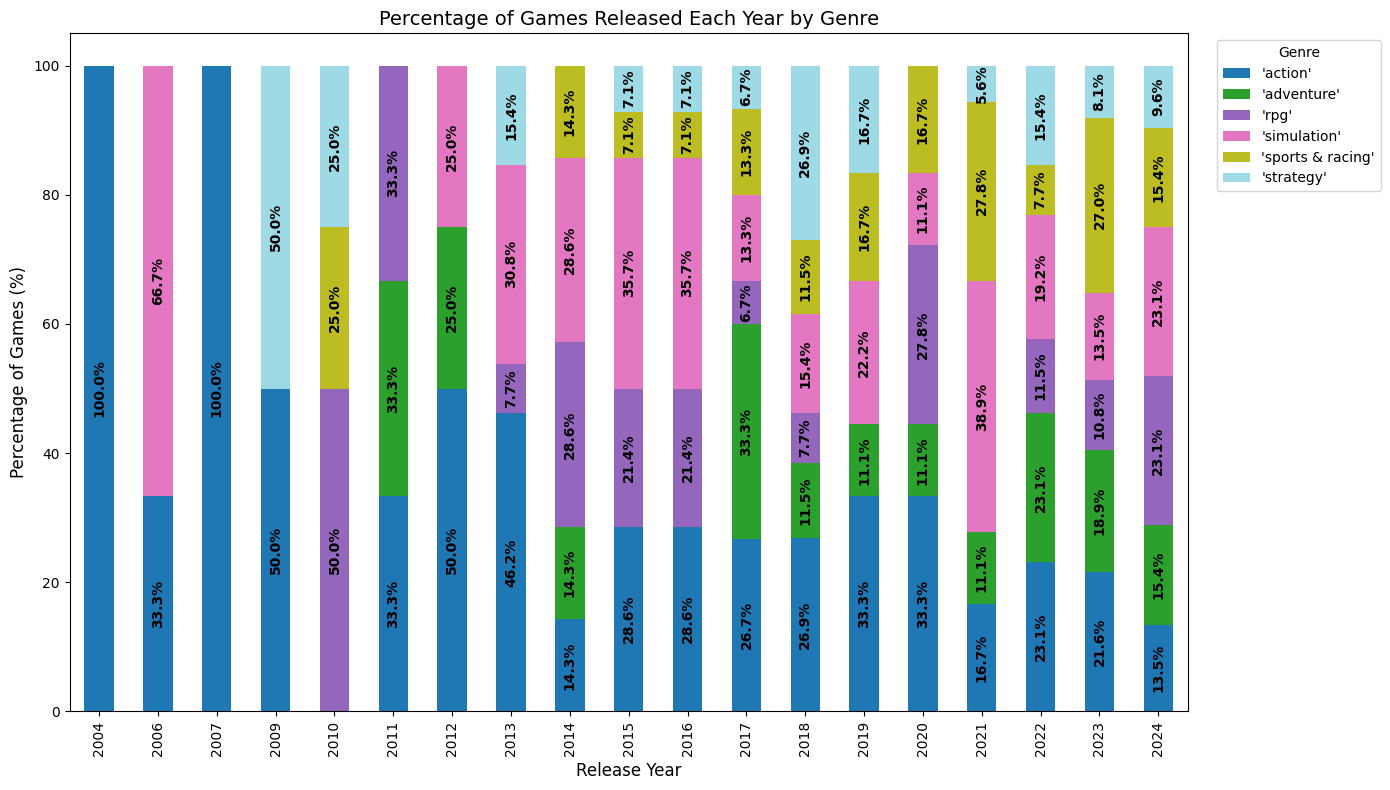

The above stacked bar chart shows the percentage distribution of unique games released each year, broken down by genre. Each bar represents a year, and the colored segments within each bar show the proportion of games from each genre in that year's releases. This visualization allows you to see how the genre mix of released games has evolved over time.

Number of unique games released each year:
release_year
2004     1
2006     3
2007     1
2009     2
2010     4
2011     3
2012     4
2013    13
2014     7
2015    14
2016    14
2017    15
2018    26
2019    18
2020    18
2021    18
2022    26
2023    37
2024    52
Name: count, dtype: int64


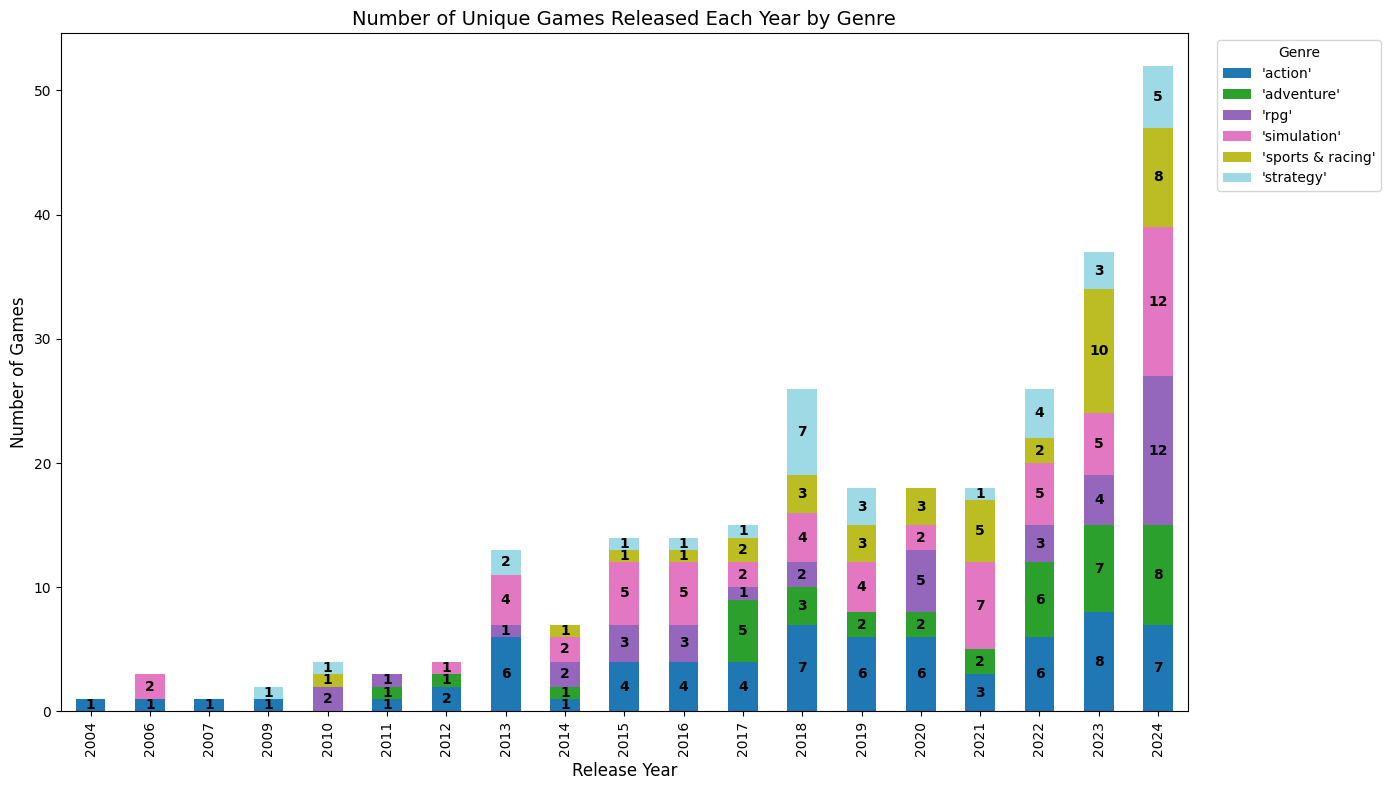

normalized_genre,'action','adventure','rpg','simulation','sports & racing','strategy'
release_year,,,,,,
2004,1,0,0,0,0,0
2006,1,0,0,2,0,0
2007,1,0,0,0,0,0
2009,1,0,0,0,0,1
2010,0,0,2,0,1,1
2011,1,1,1,0,0,0
2012,2,1,0,1,0,0
2013,6,0,1,4,0,2
2014,1,1,2,2,1,0


The above stacked bar chart displays the absolute number of unique games released each year, segmented by genre. Each bar represents a release year, with colored sections indicating the number of titles per genre for that year. This chart visualizes trends in genre popularity and the absolute growth or decline in game releases across years.


In [116]:
# Add 'release_year' column
unique_game_df['release_year'] = unique_game_df['release_date'].dt.year

# Group by release year and normalized_genre, and count number of games
games_per_year_genre_uniq = unique_game_df.groupby(['release_year', 'normalized_genre'])['game_name'].nunique().unstack(fill_value=0)

# Convert counts to percentages for each year
games_per_year_genre_pct = games_per_year_genre_uniq.div(games_per_year_genre_uniq.sum(axis=1), axis=0) * 100

# Display the resulting DataFrame as percentages
display(games_per_year_genre_pct)

# Create stacked bar plot (percentages)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))
bars = games_per_year_genre_pct.plot(
    kind='bar', 
    stacked=True, 
    colormap='tab20', 
    ax=ax
)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Percentage of Games (%)', fontsize=12)
plt.title('Percentage of Games Released Each Year by Genre', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()


# Annotate each bar with per-genre percentage values (labels vertical)
for i, (year, row) in enumerate(games_per_year_genre_pct.iterrows()):
    y_offset = 0
    for j, genre in enumerate(games_per_year_genre_pct.columns):
        pct = row[genre]
        if pct > 0:
            ax.text(
                i, 
                y_offset + pct / 2, 
                f"{pct:.1f}%", 
                ha='center', va='center', fontsize=10, color='black', fontweight='bold', rotation=90
            )
        y_offset += pct

plt.show()

# Briefly describe the graph shown above
print(
    "The above stacked bar chart shows the percentage distribution of unique games released each year, "
    "broken down by genre. Each bar represents a year, and the colored segments within each bar show "
    "the proportion of games from each genre in that year's releases. This visualization allows you to see "
    "how the genre mix of released games has evolved over time.\n"
)

release_year_counts = unique_game_df['release_year'].value_counts().sort_index()
print("Number of unique games released each year:")
print(release_year_counts)



# Create stacked bar plot, with per-genre quantity annotations
fig, ax = plt.subplots(figsize=(14, 8))
bars = games_per_year_genre_uniq.plot(
    kind='bar', 
    stacked=True, 
    colormap='tab20', 
    ax=ax
)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Games', fontsize=12)
plt.title('Number of Unique Games Released Each Year by Genre', fontsize=14)
plt.legend(title='Genre', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.tight_layout()

# Annotate each bar with per-genre numbers
for i, (year, row) in enumerate(games_per_year_genre_uniq.iterrows()):
    y_offset = 0
    for j, genre in enumerate(games_per_year_genre_uniq.columns):
        value = row[genre]
        if value > 0:
            ax.text(
                i, 
                y_offset + value / 2, 
                int(value), 
                ha='center', va='center', fontsize=10, color='black', fontweight='bold'
            )
        y_offset += value

plt.show()
unique_game_df['release_year'] = unique_game_df['release_date'].dt.year

# Group by release year and normalized_genre, and count number of games
games_per_year_genre_uniq = unique_game_df.groupby(['release_year', 'normalized_genre'])['game_name'].nunique().unstack(fill_value=0)

# Display the resulting DataFrame
display(games_per_year_genre_uniq)

# Briefly describe what is shown in the graph above
print(
    "The above stacked bar chart displays the absolute number of unique games released each year, segmented by genre. "
    "Each bar represents a release year, with colored sections indicating the number of titles per genre for that year. "
    "This chart visualizes trends in genre popularity and the absolute growth or decline in game releases across years."
)




**Year-over-year growth bar chart:**

Year-over-Year Growth in Number of Games (%):
release_year
2004           NaN
2006    200.000000
2007    -66.666667
2009    100.000000
2010    100.000000
2011    -25.000000
2012     33.333333
2013    225.000000
2014    -46.153846
2015    100.000000
2016      0.000000
2017      7.142857
2018     73.333333
2019    -30.769231
2020      0.000000
2021      0.000000
2022     44.444444
2023     42.307692
2024     40.540541
Name: count, dtype: float64


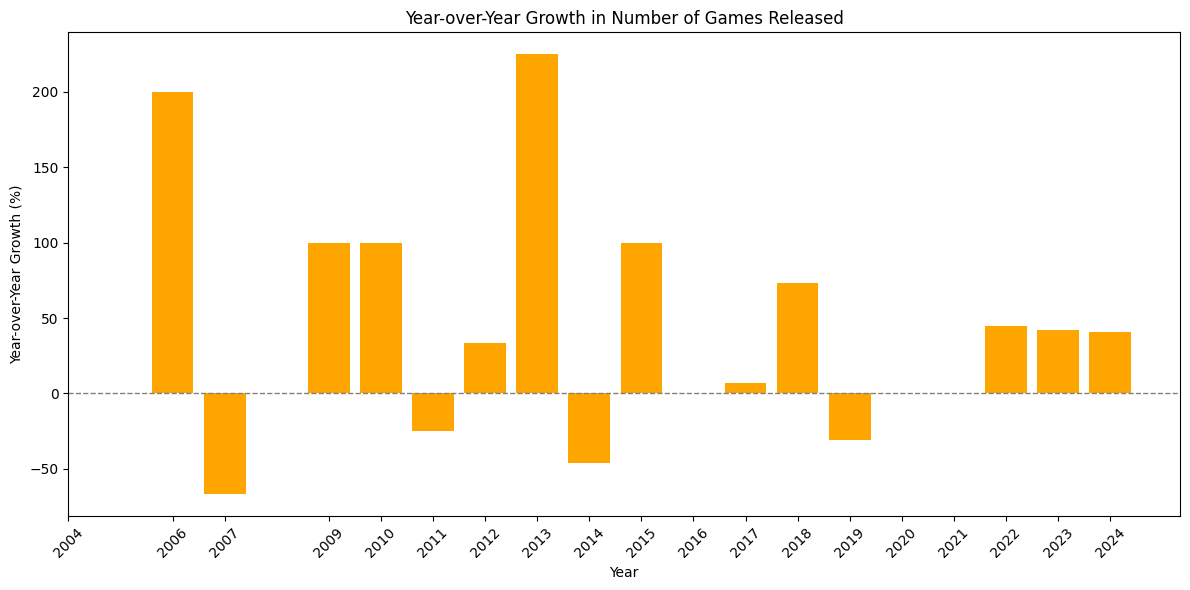

The above bar chart presents the year-over-year percentage growth in the number of games released. Each bar represents the growth rate for a specific year compared to the previous year, highlighting years of expansion or contraction in game releases.


In [117]:
# Calculate Year-over-Year Growth in Number of Games Released (%)
# games_per_year contains the count per year (already sorted by year)

# Convert to a pandas Series in case it's not
games_per_year = games_per_year.sort_index()
games_per_year_pct = games_per_year.pct_change() * 100  # % change YoY

# Display the calculated YoY growth rates
print("Year-over-Year Growth in Number of Games (%):")
print(games_per_year_pct)

# Plot the YoY growth
plt.figure(figsize=(12,6))
plt.bar(games_per_year_pct.index, games_per_year_pct.values, color='orange')
plt.xlabel('Year')
plt.ylabel('Year-over-Year Growth (%)')
plt.title('Year-over-Year Growth in Number of Games Released')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xticks(games_per_year_pct.index, rotation=45)
plt.tight_layout()
plt.show()

print(
    "The above bar chart presents the year-over-year percentage growth in the number of games released. "
    "Each bar represents the growth rate for a specific year compared to the previous year, highlighting years of expansion or contraction in game releases."
)


**Bar chart of the number of games released per era:**

Number of Games Released per Era:
era
2004-2009      7
2010-2014     31
2015-2019     87
2020-2024    151
Name: game_name, dtype: int64


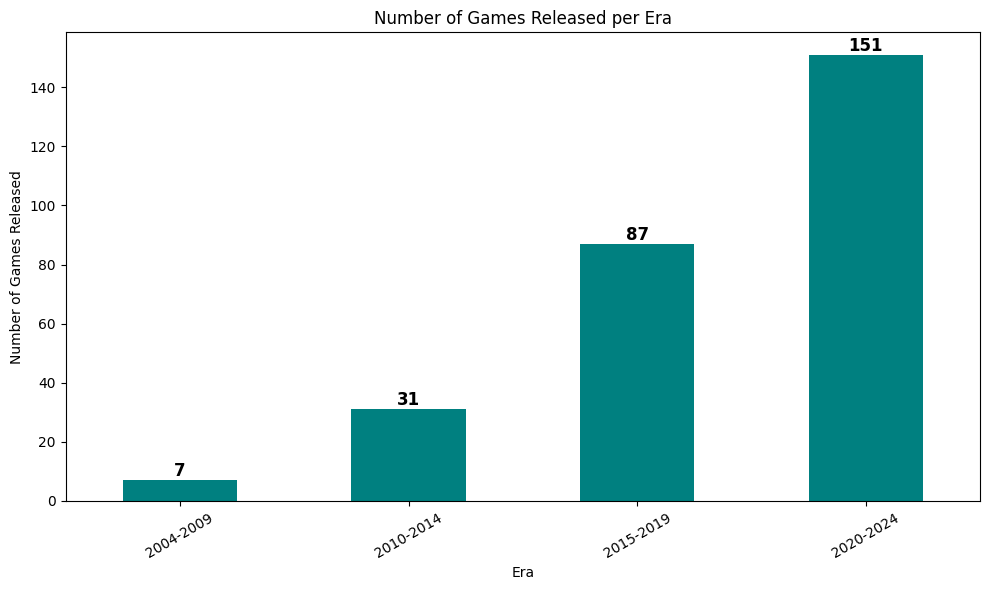

The bar chart above displays how many unique games were released in each era (based on their release year).Each bar represents a specific time period, showing at a glance which eras saw more or fewer game releases.


In [118]:
# Era Analysis: Define eras and plot games per era

# Define Era Ranges (Example: each decade or logical groupings for the dataset)
era_bins = [2004, 2010, 2015, 2020, 2025]  # Can adjust based on your release_year data
era_labels = [
    '2004-2009',
    '2010-2014',
    '2015-2019',
    '2020-2024'
]

# Extract release year from release_date if not already.
if 'release_year' not in unique_game_df.columns:
    unique_game_df['release_year'] = unique_game_df['release_date'].dt.year

# Assign games to eras
unique_game_df['era'] = pd.cut(unique_game_df['release_year'], bins=era_bins, labels=era_labels, right=False)

# Count games per era
games_per_era = unique_game_df.groupby('era', observed=False)['game_name'].count()

# Display era counts
print("Number of Games Released per Era:")
print(games_per_era)

# Add numbers to each column in the era/genre plot for clarity

# For the games_per_era bar chart:
plt.figure(figsize=(10,6))
ax = games_per_era.plot(kind='bar', color='teal')
plt.xlabel('Era')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Era')
plt.xticks(rotation=30)
plt.tight_layout()

# Annotate bars with value
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()


print(
    "The bar chart above displays how many unique games were released in each era (based on their release year)."
    "Each bar represents a specific time period, showing at a glance which eras saw more or fewer game releases."
)



**Stacked bar chart of the number of games released per era by genre:**

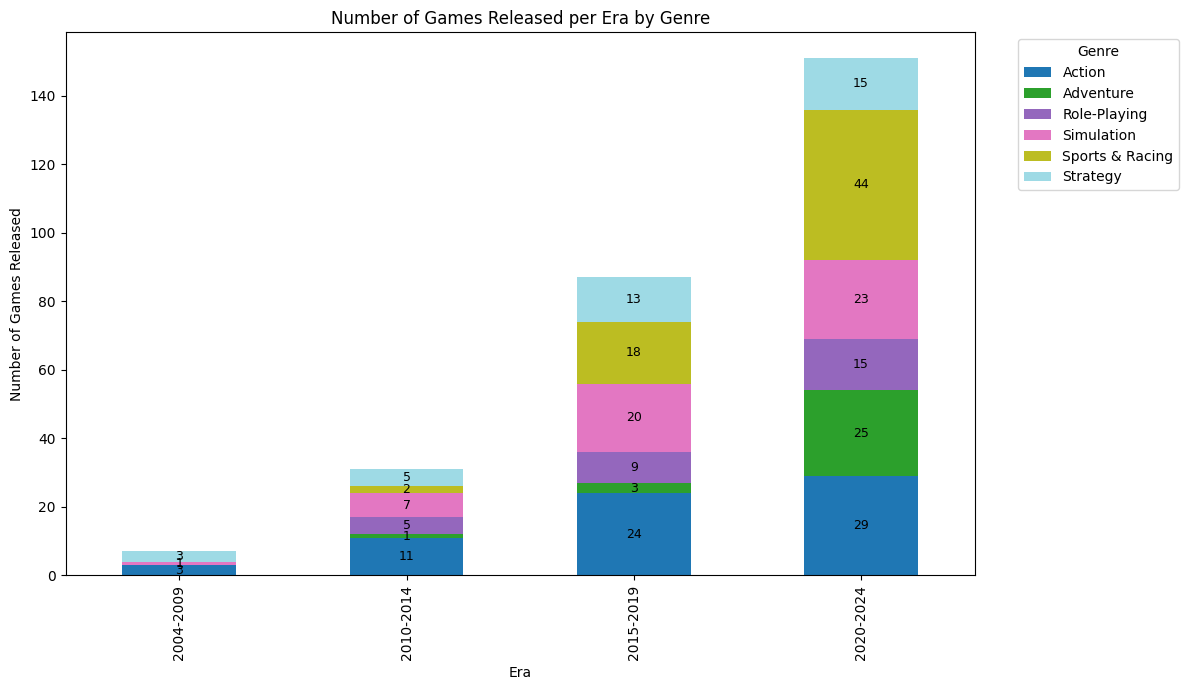

The stacked bar chart above shows the number of games released in each era, broken down by genre. Each bar represents an era, and the segments within the bars indicate how many games of each genre were released during that period. This helps visualize the evolution of genre trends in game releases over time.


In [119]:
# For the stacked bar chart per era by genre:
games_per_era_genre = unique_game_df.groupby(['era', 'genre'], observed=False)['game_name'].count().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12,7))
games_per_era_genre.plot(kind='bar', stacked=True, colormap='tab20', ax=ax)
plt.xlabel('Era')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released per Era by Genre')
plt.legend(title='Genre', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.tight_layout()

# Add numbers to each stacked bar segment
for c in ax.containers:
    for bar in c:
        height = bar.get_height()
        if height > 0:
            ax.annotate(f"{int(height)}", 
                        (bar.get_x() + bar.get_width() / 2, bar.get_y() + height/2),
                        ha='center', va='center', fontsize=9, color='black', rotation=0)

plt.show()

print(
    "The stacked bar chart above shows the number of games released in each era, broken down by genre. "
    "Each bar represents an era, and the segments within the bars indicate how many games of each genre were released during that period. "
    "This helps visualize the evolution of genre trends in game releases over time."
)



**Comparison between old games and new games - revenue and sales:**

**Grouped bar chart comparing old vs. new games in top revenue rankings by genre:**

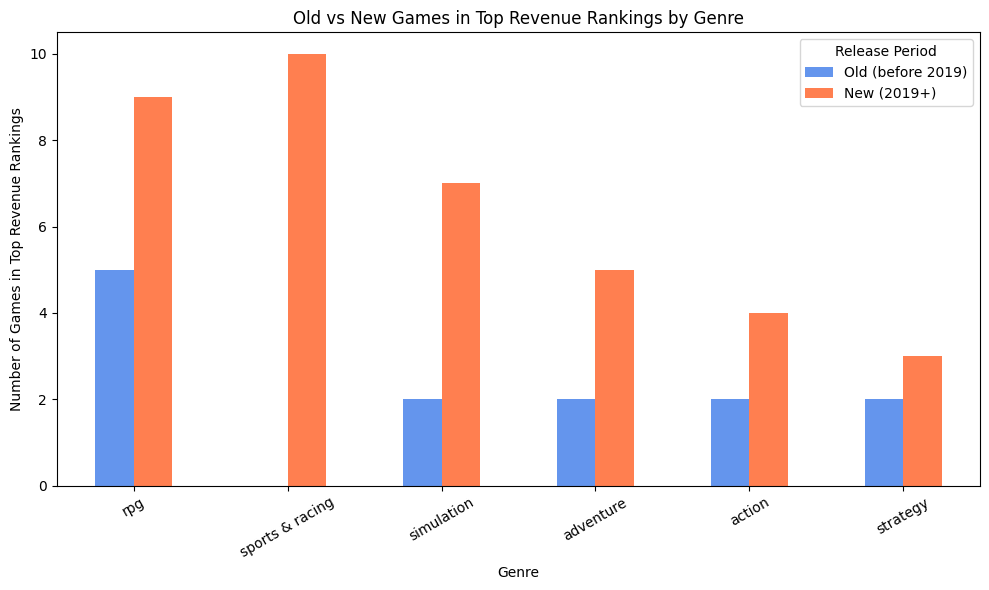

The graph shows a grouped bar chart comparing the number of "old" (before 2019) and "new" (2019 and later) games within the top revenue rankings, broken down by genre. This lets us see which genres have more top-performing recent releases versus older games among high-grossing titles.


In [120]:
# Compare old games with new games by revenue ranking and make it into a graph, by genre from unique_game_df

import matplotlib.pyplot as plt

# Explanation:
# This graph compares the number of old games (released before 2019) and new games (2019 or later)
# that are among the top revenue-ranked games on Steam, grouped by genre.
# It helps visualize which genres have more successful old vs. new titles by revenue, possibly showing trends over time.


# Only consider games with "Revenue" as rank_type
revenue_games = unique_game_df[unique_game_df['rank_type'].str.lower() == 'revenue'].copy()

# Ensure release_date is datetime
if not np.issubdtype(revenue_games['release_date'].dtype, np.datetime64):
    revenue_games['release_date'] = pd.to_datetime(revenue_games['release_date'], errors='coerce')

# Define 'Old' vs 'New' by year
revenue_games['year_category'] = np.where(revenue_games['release_date'].dt.year < 2019, 'Old (before 2019)', 'New (2019+)')

# For each game, keep only the best (lowest) revenue rank
revenue_ranked = revenue_games.sort_values('rank').drop_duplicates(subset=['game_name'], keep='first')

# Use normalized_genre and strip quotes if necessary
genre_col = 'normalized_genre'
revenue_ranked[genre_col] = revenue_ranked[genre_col].astype(str).str.strip("'").str.strip()

# Choose top 6 genres by count
top_genres = (
    revenue_ranked[genre_col]
    .value_counts()
    .head(6)
    .index
    .tolist()
)

# Prepare data for plotting: count "Old" and "New" for each genre
genre_counts = []
for genre in top_genres:
    sub = revenue_ranked[revenue_ranked[genre_col] == genre]
    old_count = (sub['year_category'] == 'Old (before 2019)').sum()
    new_count = (sub['year_category'] == 'New (2019+)').sum()
    genre_counts.append({'genre': genre, 'Old (before 2019)': old_count, 'New (2019+)': new_count})
bar_df = pd.DataFrame(genre_counts).set_index('genre')

# Plot grouped barplot
bar_df.plot(
    kind='bar',
    figsize=(10,6),
    color=['#6495ED', '#FF7F50']
)
plt.xlabel('Genre')
plt.ylabel('Number of Games in Top Revenue Rankings')
plt.title('Old vs New Games in Top Revenue Rankings by Genre')
plt.xticks(rotation=30)
plt.tight_layout()
plt.legend(title='Release Period')
plt.show()

print(
    'The graph shows a grouped bar chart comparing the number of "old" (before 2019) and "new" (2019 and later) games within the top revenue rankings, broken down by genre. This lets us see which genres have more top-performing recent releases versus older games among high-grossing titles.'
)


**Grouped bar chart comparing old vs. new games in top sales rankings by genre:**

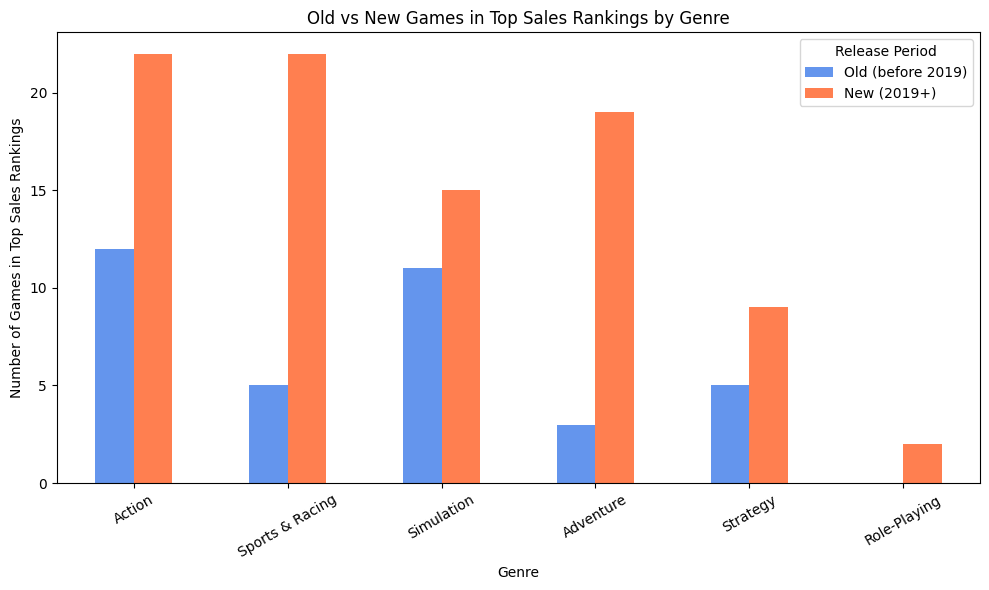

The graph above displays, for the six most popular genres by top sales ranking, how many games in each genre are considered "Old (before 2019)" versus "New (2019+)" among the top-selling games. This highlights how the sales success of different genres is distributed between older and more recently-released games.


In [121]:
# Prepare data for plotting: SALE ranks only, by genre and year group (Old/New)

# Filter to 'sale' rank_type, case insensitive
sales_ranked = unique_game_df[unique_game_df['rank_type'].str.lower() == 'sales'].copy()

# Extract 'release_year' and classify as Old/New for sale rank
if 'release_year' not in sales_ranked.columns:
    sales_ranked['release_year'] = pd.to_datetime(sales_ranked['release_date'], errors='coerce').dt.year

sales_ranked = sales_ranked.dropna(subset=['release_year'])
sales_ranked['year_category'] = sales_ranked['release_year'].apply(
    lambda x: 'Old (before 2019)' if x < 2019 else 'New (2019+)'
)

# Pick a consistent genre column -- prefer 'genre' if available
genre_col = 'genre'
if genre_col not in sales_ranked.columns:
    genre_col = 'normalized_genre'

# Top genres, as above (top 6 by value counts in 'genre' column, for sales)
top_genres_sales = (
    sales_ranked[genre_col]
    .value_counts()
    .head(6)
    .index
    .tolist()
)

# Prepare data for plotting: count "Old" and "New" for each genre for sales
genre_counts_sales = []
for genre in top_genres_sales:
    sub = sales_ranked[sales_ranked[genre_col] == genre]
    old_count = (sub['year_category'] == 'Old (before 2019)').sum()
    new_count = (sub['year_category'] == 'New (2019+)').sum()
    genre_counts_sales.append({'genre': genre, 'Old (before 2019)': old_count, 'New (2019+)': new_count})
bar_df_sales = pd.DataFrame(genre_counts_sales).set_index('genre')

# Plot grouped barplot for sales
bar_df_sales.plot(
    kind='bar',
    figsize=(10,6),
    color=['#6495ED', '#FF7F50']
)
plt.xlabel('Genre')
plt.ylabel('Number of Games in Top Sales Rankings')
plt.title('Old vs New Games in Top Sales Rankings by Genre')
plt.xticks(rotation=30)
plt.tight_layout()
plt.legend(title='Release Period')
plt.show()

print(
    'The graph above displays, for the six most popular genres by top sales ranking, how many games in each genre are considered "Old (before 2019)" versus "New (2019+)" among the top-selling games. This highlights how the sales success of different genres is distributed between older and more recently-released games.'
)


**Best Selling Genres by Sales and Revenuw Rank:**

**Scatter plot showing the best-selling genre per year by sales rank:**

Best (Lowest) Sales Rank Genre Per Year:


,release_year,genre,rank
0,2012,Action,1
1,2013,Action,9
2,2014,Simulation,8
3,2015,Sports & Racing,12
4,2016,Simulation,11
5,2017,Action,6
6,2018,Simulation,25
7,2019,Sports & Racing,10
8,2020,Action,3
9,2021,Action,14


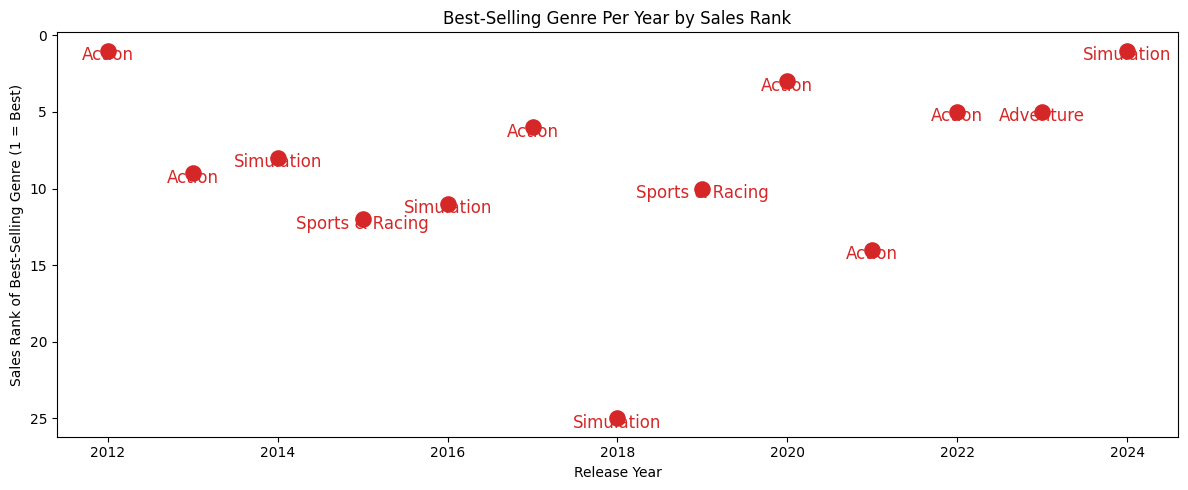

This graph shows, for each year, the genre of the best-selling game by sales rank (as the lowest/earliest sales rank), with the rank number displayed on the y-axis (so 1 means the best overall). Only the single top genre per year is displayed.


In [122]:
# For each year, select only the single genre that achieved the very best (lowest) sales rank, and plot y=its rank.

# Ensure release_year column exists
if 'release_year' not in unique_game_df.columns:
    unique_game_df['release_year'] = pd.to_datetime(unique_game_df['release_date'], errors='coerce').dt.year

# Filter to only 'Sales' rank_type and valid data
sales_df = unique_game_df[unique_game_df['rank_type'].str.lower() == 'sales'].copy()
sales_df = sales_df.dropna(subset=['release_year', 'genre', 'rank'])

# For each year, get the genre of the game with the very lowest (best) sales rank (i.e., genre of the #1 best seller)
best_per_year = (
    sales_df
    .sort_values(['release_year', 'rank'], ascending=[True, True])
    .groupby('release_year', as_index=False)
    .first()[['release_year', 'genre', 'rank']]
)

# Show the table for clarity
print("Best (Lowest) Sales Rank Genre Per Year:")
display(best_per_year)

# Plot: one point per year, with genre name horizontal at each dot
plt.figure(figsize=(12, 5))
plt.scatter(best_per_year['release_year'], best_per_year['rank'], color='#D62728', s=120)

# Annotate genre horizontally for each year
for _, row in best_per_year.iterrows():
    plt.text(
        row['release_year'], row['rank'] - 0.3,  # adjust so the text is just above the dot
        row['genre'],
        ha='center', va='top', fontsize=12, color='#D62728', rotation=0
    )

plt.xlabel("Release Year")
plt.ylabel("Sales Rank of Best-Selling Genre (1 = Best)")
plt.title("Best-Selling Genre Per Year by Sales Rank")
plt.gca().invert_yaxis()  # 1 is best, show at top
plt.tight_layout()
plt.show()

print(
    "This graph shows, for each year, the genre of the best-selling game by sales rank (as the lowest/earliest sales rank), "
    "with the rank number displayed on the y-axis (so 1 means the best overall). Only the single top genre per year is displayed."
)


**Scatter plot showing the top-grossing genre per year by revenue rank:**

Best (Lowest) Revenue Rank Genre Per Year (Selected Years):


,release_year,genre,rank
0,2012,Action,39
1,2014,Action,30
2,2016,Role-Playing,27
3,2018,Strategy,29
4,2020,Role-Playing,31
5,2022,Sports & Racing,27
6,2024,Action,18


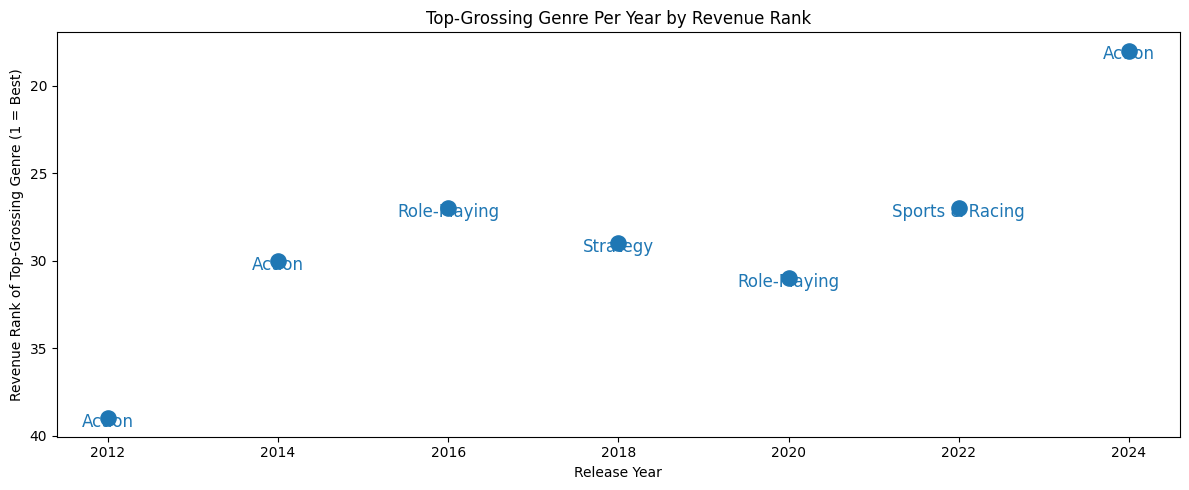

This graph shows, for each chosen year, the genre of the top-grossing game by revenue rank (as the lowest/earliest revenue rank), with the rank number displayed on the y-axis (so 1 means the best overall in revenue). Only the single top genre per selected year is displayed.


In [123]:
# Plot the same graph as above, but for best (lowest) revenue rank genre per year,
# but limit to years: 2012, 2014, 2016, 2018, 2020, 2022, 2024

filter_years = [2012, 2014, 2016, 2018, 2020, 2022, 2024]

# Prepare revenue_df like sales_df, but for revenue
revenue_df = unique_game_df[unique_game_df['rank_type'].str.lower() == 'revenue'].copy()
revenue_df = revenue_df.dropna(subset=['release_year', 'genre', 'rank'])

# Only include desired years
revenue_df = revenue_df[revenue_df['release_year'].isin(filter_years)]

# For each year, get the genre of the game with the very lowest (best) revenue rank
best_revenue_per_year = (
    revenue_df
    .sort_values(['release_year', 'rank'], ascending=[True, True])
    .groupby('release_year', as_index=False)
    .first()[['release_year', 'genre', 'rank']]
)

# Sort table by year for display and plotting
best_revenue_per_year = best_revenue_per_year.sort_values('release_year')

# Show the table
print("Best (Lowest) Revenue Rank Genre Per Year (Selected Years):")
display(best_revenue_per_year)

# Plot: one point per year, with genre name horizontal at each dot
plt.figure(figsize=(12, 5))
plt.scatter(best_revenue_per_year['release_year'], best_revenue_per_year['rank'], color='#1F77B4', s=120)

# Annotate genre horizontally for each year
for _, row in best_revenue_per_year.iterrows():
    plt.text(
        row['release_year'], row['rank'] - 0.3,
        row['genre'],
        ha='center', va='top', fontsize=12, color='#1F77B4', rotation=0
    )

plt.xlabel("Release Year")
plt.ylabel("Revenue Rank of Top-Grossing Genre (1 = Best)")
plt.title("Top-Grossing Genre Per Year by Revenue Rank")
plt.gca().invert_yaxis()  # 1 is best, show at top
plt.tight_layout()
plt.show()

print(
    "This graph shows, for each chosen year, the genre of the top-grossing game by revenue rank (as the lowest/earliest revenue rank), "
    "with the rank number displayed on the y-axis (so 1 means the best overall in revenue). Only the single top genre per selected year is displayed."
)

# •	*KPI  – Genre Average Rating*

Calculate average rating for each genre – a classic and clear KPI

 **KPI  – Average Player Rating by Genre** - Calculated as the average rating of all games in each genre

Main table for KPI: unique_game_df

                 mean   std  count
genre                             
Action           5.73  1.33     67
Adventure        5.72  1.25     29
Role-Playing     6.34  0.81     29
Simulation       5.80  1.39     51
Sports & Racing  5.35  1.49     60
Strategy         5.89  1.28     36


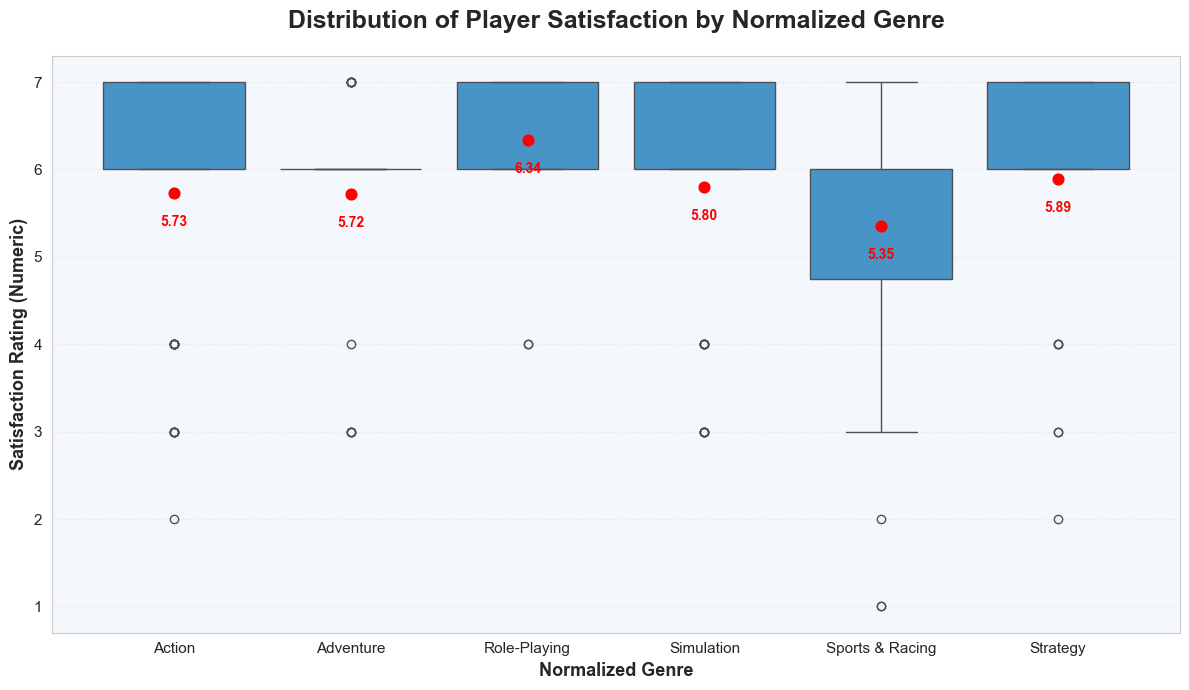

In [124]:
# --- ייבוא ספריות ---
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- העתקה לנוחות עבודה ---
df = unique_game_df.copy()

# --- חישוב סטטיסטיקות לפי ז'אנר מנורמל ---
stats_by_genre = (
    df.groupby('genre')['overall_player_rating_numeric']
      .agg(mean='mean', std='std', count='count')
      .round(2)
)
print(stats_by_genre)

# --- הגדרת גרף ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

# --- Boxplot לפי ז'אנר מנורמל, סדר לפי stats_by_genre ---
ax = sns.boxplot(
    data=df,
    x='genre',
    y='overall_player_rating_numeric',
    color="#3498db",
    showfliers=True,
    medianprops={'visible': False},
    order=stats_by_genre.index
)

# --- הוספת ממוצע כנקודה אדומה + ערך מעליה ---
for i, genre in enumerate(stats_by_genre.index):
    mean_val = stats_by_genre.loc[genre, 'mean']
    ax.scatter(i, mean_val, color='red', s=60, zorder=3)
    ax.text(
        i,
        mean_val - 0.25,  # ניתן לכוון את המרחק אם צריך
        f"{mean_val:.2f}",
        ha='center',
        va='top',
        fontsize=10,
        fontweight='bold',
        color='red'
    )

# --- עיצוב גרף ---
ax.set_title(
    'Distribution of Player Satisfaction by Normalized Genre',
    fontsize=18,
    fontweight='bold',
    pad=20
)
ax.set_xlabel('Normalized Genre', fontsize=13, fontweight='bold')
ax.set_ylabel('Satisfaction Rating (Numeric)', fontsize=13, fontweight='bold')

ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)

ax.set_facecolor('#f4f7fb')
plt.grid(axis='y', linestyle=':', alpha=0.4)

plt.tight_layout()
plt.show()

Insights: Average Player Rating by Genre

Role-Playing is the highest-rated genre (Avg Rating: 6.34)

Indicates strong narrative depth, character development, and higher player engagement.

RPG games generally receive more positive feedback due to richer gameplay experiences.

Strategy and Simulation maintain consistently strong ratings (5.89 and 5.80)

These genres appeal to niche but highly dedicated audiences.

Their gameplay relies on depth, complexity, and long-term mastery, which tends to generate high satisfaction.

Action and Adventure fall in the mid-range (≈5.7)

While very popular genres, they feature a wide variety of titles — including lower-quality or repetitive releases — which lowers the overall average rating.

Sports & Racing is the lowest-rated genre (5.35)

Often impacted by annual releases, limited innovation, and repetitive mechanics.

Players tend to be more critical of this genre, resulting in lower average scores.

**RPG leads in quality, Strategy and Simulation show strong consistency, while Sports & Racing struggles with lower player satisfaction.**

**KPI  – Average Player Rating by Genre** - Optional

In [125]:
# Calculate the KPI - Average Player Rating by Genre
# This computes the mean of the overall_player_rating_numeric for each genre in unique_game_df

genre_avg_rating = unique_game_df.groupby('genre')['overall_player_rating_numeric'].mean().sort_values(ascending=False).round(3)
print("Average Player Rating by Genre:")
print(genre_avg_rating)


Average Player Rating by Genre:
genre
Role-Playing       6.345
Strategy           5.889
Simulation         5.804
Action             5.731
Adventure          5.724
Sports & Racing    5.350
Name: overall_player_rating_numeric, dtype: float64


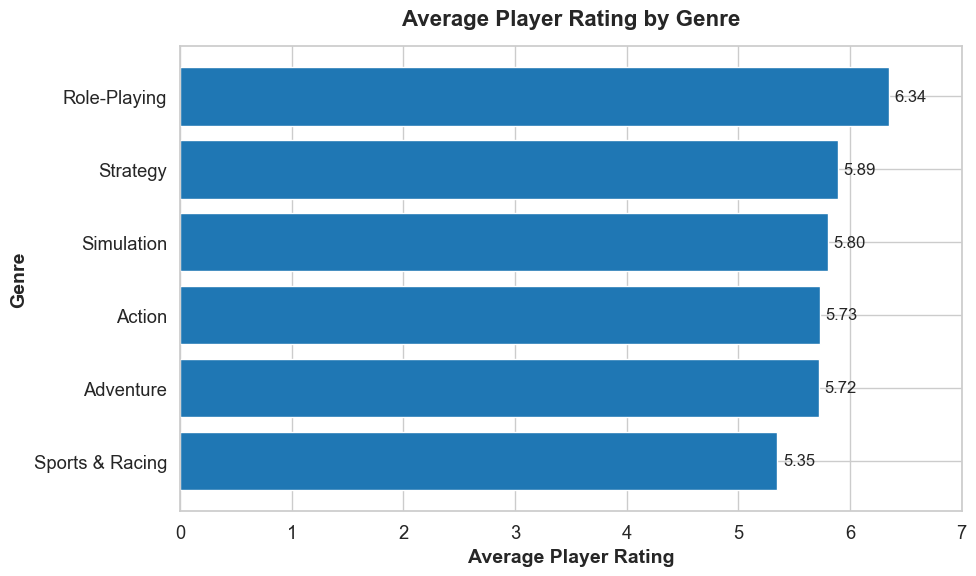

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set(style='whitegrid', font_scale=1.2)

# Sort by average rating for plot order
genre_avg_rating_sorted = genre_avg_rating.sort_values(ascending=True)

bar_color = "#1f77b4"  # a typical blue used in matplotlib

bars = plt.barh(genre_avg_rating_sorted.index, genre_avg_rating_sorted.values, color=bar_color)

plt.xlabel('Average Player Rating', fontsize=14, weight='bold')
plt.ylabel('Genre', fontsize=14, weight='bold')
plt.title('Average Player Rating by Genre', fontsize=16, weight='bold', pad=15)
plt.xlim(0, 7)
plt.tight_layout()

# Annotate bars with value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=12)

plt.show()

## Distribution of Rating Scores

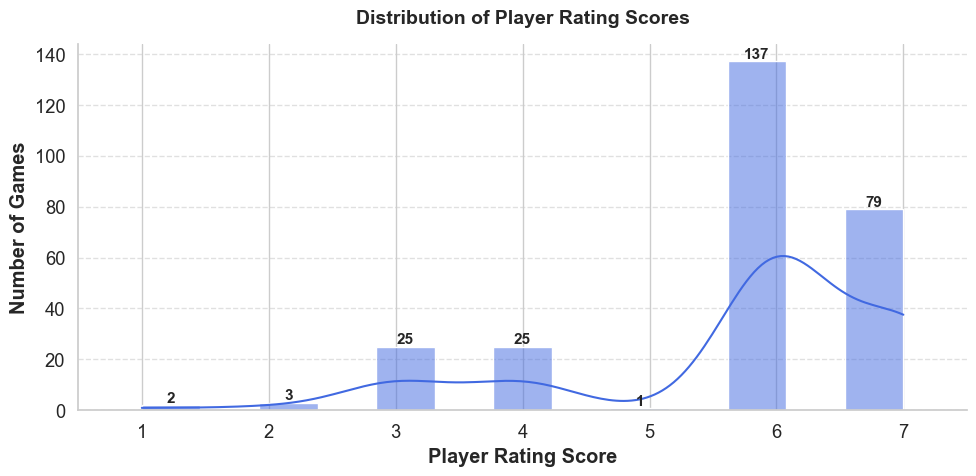

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(
    unique_game_df["overall_player_rating_numeric"].dropna(),
    bins=13,
    kde=True,
    color="royalblue"
)
plt.title("Distribution of Player Rating Scores", fontsize=14, weight="bold", pad=15)
plt.xlabel("Player Rating Score", fontweight='bold')
plt.ylabel("Number of Games", fontweight='bold')
plt.xlim(0.5, 7.5)
plt.xticks(range(1,8))
plt.grid(axis='y', linestyle="--", alpha=0.6)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotate bars in histogram
for p in plt.gca().patches:
    if p.get_height() > 0:
        plt.gca().annotate(int(p.get_height()), 
                         (p.get_x() + p.get_width()/2, p.get_height()), 
                         ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [128]:
# Conclusion and Insight from the Player Rating Distribution

print("Conclusion & Insights on Distribution of Player Rating Scores:\n")

# Calculate descriptive stats for ratings
rating_counts = unique_game_df["overall_player_rating_numeric"].value_counts().sort_index()
mean_rating = unique_game_df["overall_player_rating_numeric"].mean()
median_rating = unique_game_df["overall_player_rating_numeric"].median()
mode_rating = unique_game_df["overall_player_rating_numeric"].mode().iloc[0]

print(f"- The histogram shows that most games cluster around a rating of 6 and 7, with very few games rated below 4.")
print(f"- Descriptive stats: mean = {mean_rating:.2f}, median = {median_rating:.0f}, mode = {mode_rating:.0f}")
print(f"- Distribution is right-skewed: Low ratings (1-3) are rare, high ratings (6-7) dominate.")
print(f"- This suggests that Steam games in the top ranks tend to be well-received.")
print(f"- Possible reasons: selection bias for popular games, or generally high user enthusiasm.")
print(f"- Developers should note that to compete at the top, a game often needs high ratings (6-7).")

print("\nAdditional Notes:")
print("- There is some granularity around numeric scores: only integer values from 1 to 7 appear.")
print("- The large proportion of games clustered at 6-7 indicates either generous user reviews or a system that bins most positive reviews together.")


Conclusion & Insights on Distribution of Player Rating Scores:

- The histogram shows that most games cluster around a rating of 6 and 7, with very few games rated below 4.
- Descriptive stats: mean = 5.75, median = 6, mode = 6
- Distribution is right-skewed: Low ratings (1-3) are rare, high ratings (6-7) dominate.
- This suggests that Steam games in the top ranks tend to be well-received.
- Possible reasons: selection bias for popular games, or generally high user enthusiasm.
- Developers should note that to compete at the top, a game often needs high ratings (6-7).

Additional Notes:
- There is some granularity around numeric scores: only integer values from 1 to 7 appear.
- The large proportion of games clustered at 6-7 indicates either generous user reviews or a system that bins most positive reviews together.


## Distribution of Number of Reviews (English)

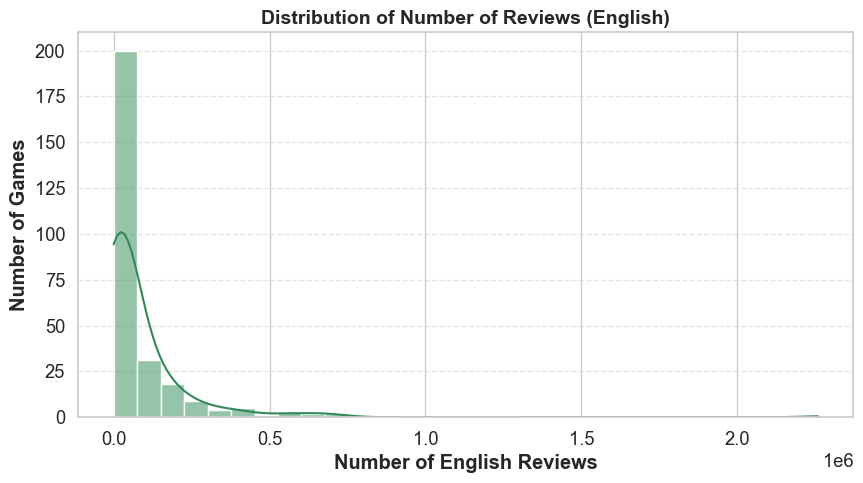

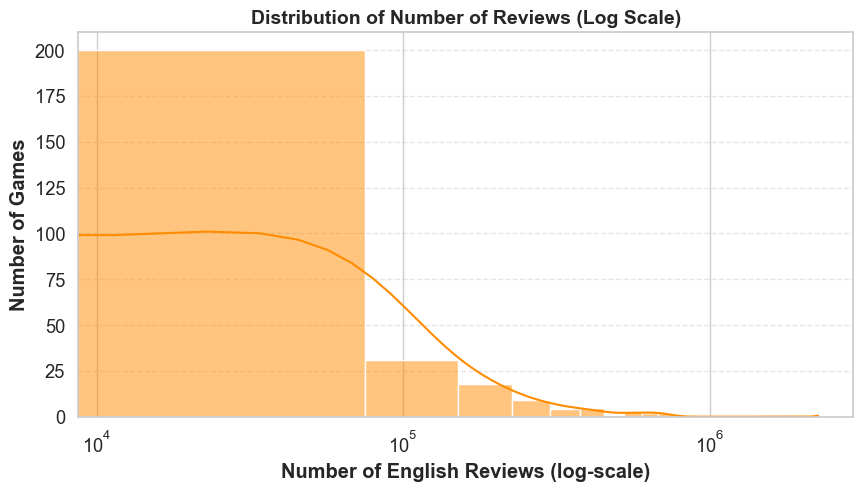

In [129]:
# Distribution of number of reviews (number_of_english_reviews)
plt.figure(figsize=(10,5))
sns.histplot(
    data=unique_game_df,
    x="number_of_english_reviews",
    bins=30,
    kde=True,
    color="seagreen"
)
plt.title("Distribution of Number of Reviews (English)", fontsize=14,fontweight='bold')
plt.xlabel("Number of English Reviews", fontweight='bold')
plt.ylabel("Number of Games", fontweight='bold')
plt.yscale('linear')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# Also plot on a log scale for x-axis because of high skew
plt.figure(figsize=(10,5))
sns.histplot(
    data=unique_game_df,
    x="number_of_english_reviews",
    bins=30,
    kde=True,
    color="darkorange"
)
plt.xscale('log')
plt.title("Distribution of Number of Reviews (Log Scale)", fontsize=14, fontweight='bold')
plt.xlabel("Number of English Reviews (log-scale)", fontweight='bold')
plt.ylabel("Number of Games", fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [130]:
# Conclusion and insights from the distribution histograms

# 1. Distribution of Rating Scores
print("Conclusion & Insights: Distribution of Player Rating Scores")
print("-----------------------------------------------------------")
print(
    "• The distribution of player rating scores is right-skewed, with the majority of games clustered at higher player ratings (6.0 and 7.0).\n"
    "• This indicates that most top games on Steam have generally positive or very positive user feedback.\n"
    "• There are relatively few games with low (1.0–4.0) scores among the top-ranked, suggesting poor-rated games rarely make it to top ranks."
)
print()
# 2. Distribution of Number of Reviews (English)
print("Conclusion & Insights: Distribution of Number of English Reviews")
print("----------------------------------------------------------------")
print(
    "• The histogram for number of English reviews shows a highly skewed distribution, with most games having a moderate number of reviews but a few games having an extremely high review count.\n"
    "• When visualized on a log scale, the distribution smooths out, revealing a broad spectrum of popularity among top games.\n"
    "• This suggests a 'long tail' effect—most games in the top list are moderately popular, while a small subset ('blockbusters') attract a massive player base and review count."
)
print()
print(
    "Overall Insight:\n"
    "The Steam top games dataset is dominated by high-rated games, as expected, and features immense variability in popularity levels, with true 'megahits' standing out, while the majority enjoy moderate success."
)


Conclusion & Insights: Distribution of Player Rating Scores
-----------------------------------------------------------
• The distribution of player rating scores is right-skewed, with the majority of games clustered at higher player ratings (6.0 and 7.0).
• This indicates that most top games on Steam have generally positive or very positive user feedback.
• There are relatively few games with low (1.0–4.0) scores among the top-ranked, suggesting poor-rated games rarely make it to top ranks.

Conclusion & Insights: Distribution of Number of English Reviews
----------------------------------------------------------------
• The histogram for number of English reviews shows a highly skewed distribution, with most games having a moderate number of reviews but a few games having an extremely high review count.
• When visualized on a log scale, the distribution smooths out, revealing a broad spectrum of popularity among top games.
• This suggests a 'long tail' effect—most games in the top li

## Top Games by Number of Reviews

Top 10 Games by Number of English Reviews:


,game_name,genre,number_of_english_reviews
0,counter-strike 2,Action,2258990.0
1,dota 2,Action,731670.0
2,team fortress 2,Action,683340.0
3,terraria,Action,657354.0
4,tom clancy's rainbow six® siege,Action,646088.0
5,grand theft auto v,Action,591334.0
6,rust,Action,550141.0
7,garry's mod,Simulation,548369.0
8,elden ring,Action,491741.0
9,pubg: battlegrounds,Action,417109.0


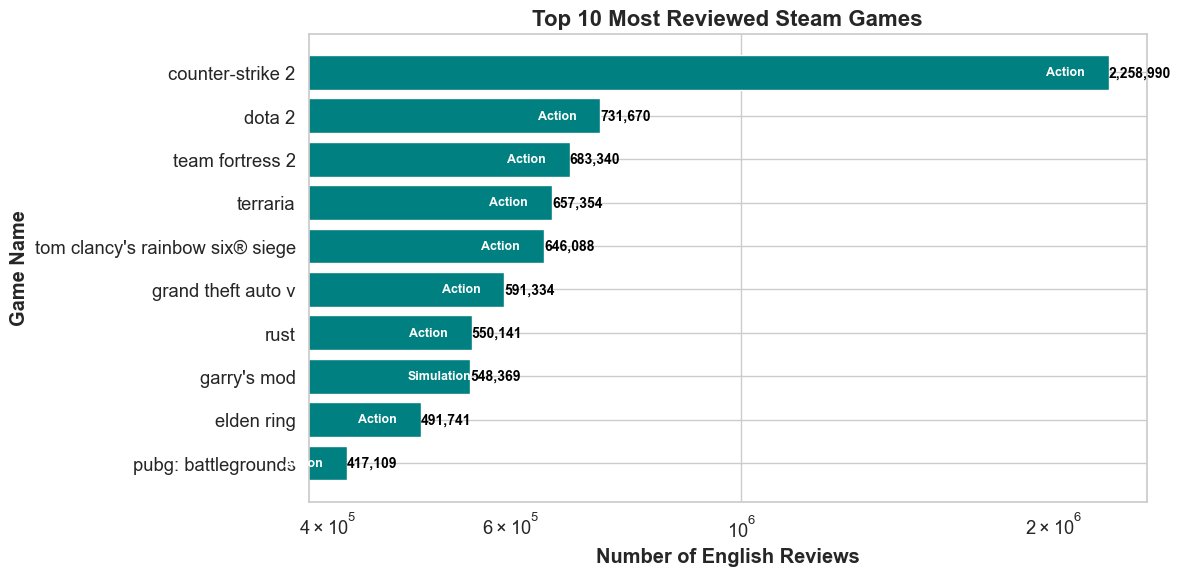

In [131]:
# Display top games by number of English reviews

# Sort the DataFrame to get top games by number of reviews
top_reviewed_games = unique_game_df.sort_values(
    by="number_of_english_reviews", ascending=False
).reset_index(drop=True)

# Show the top 15 games with most English reviews
top_n = 10
print("Top {} Games by Number of English Reviews:".format(top_n))
display(top_reviewed_games[["game_name", "genre", "number_of_english_reviews"]].head(top_n))

# Visualize the distribution for the top 15 games
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_games_to_plot = top_reviewed_games.head(top_n)
plt.barh(
    top_games_to_plot["game_name"][::-1],
    top_games_to_plot["number_of_english_reviews"][::-1],
    color="teal"
)

# Add value labels and genre labels to each bar
for i, (name, value, genre) in enumerate(zip(
    top_games_to_plot["game_name"][::-1],
    top_games_to_plot["number_of_english_reviews"][::-1],
    top_games_to_plot["genre"][::-1]
)):
    # Value label (number of reviews)
    plt.text(
        value,                      # x-position (end of bar)
        i,                          # y-position (bar center)
        f"{int(value):,}",          # formatted value
        va="center", ha="left",
        fontsize=10, color="black", fontweight="bold"
    )
    # Genre label (next to the bar, before the value)
    plt.text(
        value * 0.87,               # position somewhere inside the bar (60% of bar length)
        i,
        genre,
        va="center", ha="left",
        fontsize=9, color="white", fontweight="bold"
    )

# # Add value labels to each horizontal bar in the bar chart
# for i, (name, value) in enumerate(zip(top_games_to_plot["game_name"][::-1], top_games_to_plot["number_of_english_reviews"][::-1])):
#     plt.text(
#         value,                      # x position (bar end)
#         i,                          # y position (bar center)
#         f"{int(value):,}",          # formatted value with thousands separator
#         va="center", ha="left", fontsize=10, color="black", fontweight="bold"
#     )

    
plt.title("Top {} Most Reviewed Steam Games".format(top_n), fontsize=16, fontweight='bold')
plt.xscale('log')
plt.xlabel("Number of English Reviews", fontweight='bold')
plt.ylabel("Game Name", fontweight='bold')
plt.tight_layout()
plt.show()


In [132]:
# Conclusion on the Bar Chart: "Top 10 Most Reviewed Steam Games"

print(
    """
Conclusion:
The bar chart visualizes the Steam games with the highest number of English reviews, indicating their immense popularity among the player base. A few key observations can be made:
- "Counter-Strike 2" overwhelmingly leads in the number of English reviews by a significant margin, followed by titles like "Dota 2," "Team Fortress 2," and "Terraria."
- The top-reviewed games are predominantly from the Action genre, suggesting that Action games tend to attract larger and more vocal player communities on Steam.
- Most games in the top 10 are long-standing, well-supported titles, reinforcing the idea that games with a longer presence and active updates accumulate more player engagement and feedback.
- There is a steep drop-off in review counts after the top 2-3 games, highlighting just how much the Steam platform is dominated by a handful of blockbuster titles.

Overall, this chart demonstrates a highly skewed popularity distribution among Steam games, with a few mega-hits receiving the majority of user attention and reviews.
    """
)



Conclusion:
The bar chart visualizes the Steam games with the highest number of English reviews, indicating their immense popularity among the player base. A few key observations can be made:
- "Counter-Strike 2" overwhelmingly leads in the number of English reviews by a significant margin, followed by titles like "Dota 2," "Team Fortress 2," and "Terraria."
- The top-reviewed games are predominantly from the Action genre, suggesting that Action games tend to attract larger and more vocal player communities on Steam.
- Most games in the top 10 are long-standing, well-supported titles, reinforcing the idea that games with a longer presence and active updates accumulate more player engagement and feedback.
- There is a steep drop-off in review counts after the top 2-3 games, highlighting just how much the Steam platform is dominated by a handful of blockbuster titles.

Overall, this chart demonstrates a highly skewed popularity distribution among Steam games, with a few mega-hits receiv

## Rating vs Reviews (Correlation Exploration)

In [133]:
# Categorize games into "Top Tier", "Hidden Gem", and "Popular but Low Rated"
# Criteria (modify as needed):
# - "Top Tier": Above-median rating AND above-median review count
# - "Hidden Gem": Above-median rating BUT below-median review count
# - "Popular but Low Rated": Below-median rating AND above-median review count

import pandas as pd
import numpy as np

df = unique_game_df.copy()

# Use your normalized columns for better scaling
df['pop_index'] = (np.log1p(df['number_of_english_reviews'])).round(3)

rating_med = df['overall_player_rating_numeric'].median()
pop_med = df['pop_index'].median()

def categorize(row):
    rating = row['overall_player_rating_numeric']
    pop = row['pop_index']

    if rating >= rating_med and pop >= pop_med:
        return "Top Tier"
    elif rating >= rating_med and pop < pop_med:
        return "Hidden Gem"
    elif rating < rating_med and pop >= pop_med:
        return "Popular but Low Rated"
    else:
        return "Other"

df['category'] = df.apply(categorize, axis=1)

df[['game_name', 'genre','overall_player_rating_numeric','pop_index','category']].head(10)

,game_name,genre,overall_player_rating_numeric,pop_index,category
0,counter-strike 2,Action,6.0,14.630,Top Tier
1,"warhammer 40,000: space marine 2",Action,6.0,10.857,Top Tier
2,cyberpunk 2077,Action,6.0,12.689,Top Tier
3,black myth: wukong,Action,7.0,10.858,Top Tier
4,elden ring,Action,6.0,13.106,Top Tier
5,pubg: battlegrounds,Action,3.0,12.941,Popular but Low Rated
7,apex legends™,Action,3.0,12.915,Popular but Low Rated
8,dota 2,Action,6.0,13.503,Top Tier
9,party animals,Action,4.0,9.689,Other
10,total war: warhammer iii,Action,3.0,11.023,Popular but Low Rated


In [ ]:
export_df = df[
    [
        'game_name',
        'genre',
        'overall_player_rating_numeric',
        'number_of_english_reviews',
        'pop_index',
        'category'
    ]
].copy()

# יצוא לקובץ CSV
export_df.to_csv(
    "steam_games_categories.csv",
    index=False,
    encoding="utf-8-sig"
)

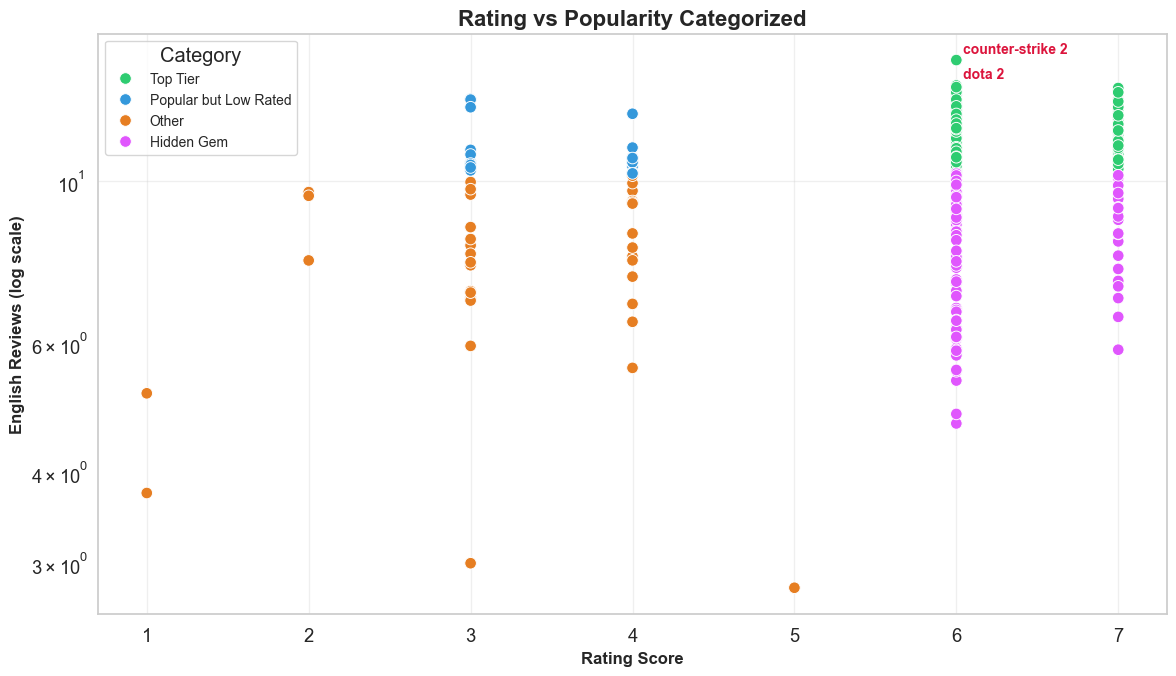

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))

sns.scatterplot(
    data=df,
    x='overall_player_rating_numeric',
    y='pop_index',
    hue='category',
    palette={
        "Top Tier": "#2ecc71",              # green
        "Hidden Gem": "#e056fd",            # purple/pink
        "Popular but Low Rated": "#3498db", # blue
        "Other": "#e67e22"                  # orange
    },
    s=70,
    marker='o'   # <<< All markers are circles
)

plt.yscale("log")
plt.xlabel("Rating Score", fontsize=12, fontweight='bold')
plt.ylabel("English Reviews (log scale)", fontsize=12, fontweight='bold')
plt.title("Rating vs Popularity Categorized", fontsize=16, fontweight='bold')

plt.legend(title="Category", fontsize=10)
plt.grid(alpha=0.3)

# Optionally annotate outliers (top 3 reviewed games)
top_reviewed = df.sort_values("pop_index", ascending=False).head(2)
for _, row in top_reviewed.iterrows():
    plt.annotate(
        row["game_name"],
        xy=(
            row["overall_player_rating_numeric"],
            row["pop_index"]
        ),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        color='crimson',
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

**Popularity alone is not an indicator of quality — and high-quality games can exist under the radar.**

In [137]:
# Rating vs Popularity Categorized — Key Insights for Presentation

print("Key Insights: Rating vs Popularity Categorized")
print("-" * 55)
print("• Most top-reviewed games also have high ratings, but not all popular games are highly rated.")
print("• 'Top Tier' games dominate both in user rating and review volume (e.g., Counter-Strike 2).")
print("• 'Hidden Gems' feature very high ratings with below-median review counts—these are potential under-the-radar favorites.")
print("• Some games with enormous review counts have only moderate ratings, landing in the 'Popular but Low Rated' zone.")
print("• Genre, franchise, or being free-to-play often boosts popularity, but not always ratings (e.g., some battle royale and MMO games).")
print("• Useful for identifying where marketing or quality improvements could have the biggest impact.")


Key Insights: Rating vs Popularity Categorized
-------------------------------------------------------
• Most top-reviewed games also have high ratings, but not all popular games are highly rated.
• 'Top Tier' games dominate both in user rating and review volume (e.g., Counter-Strike 2).
• 'Hidden Gems' feature very high ratings with below-median review counts—these are potential under-the-radar favorites.
• Some games with enormous review counts have only moderate ratings, landing in the 'Popular but Low Rated' zone.
• Genre, franchise, or being free-to-play often boosts popularity, but not always ratings (e.g., some battle royale and MMO games).
• Useful for identifying where marketing or quality improvements could have the biggest impact.


# •	*KPI  – Popularity Index by Genre*

Measure popularity of games in each genre, by number of reviews in english

KPI  – Popularity Index by Genre - Calculated as the average and median popularity index of all games per genre

Main table for KPI: unique_game_df

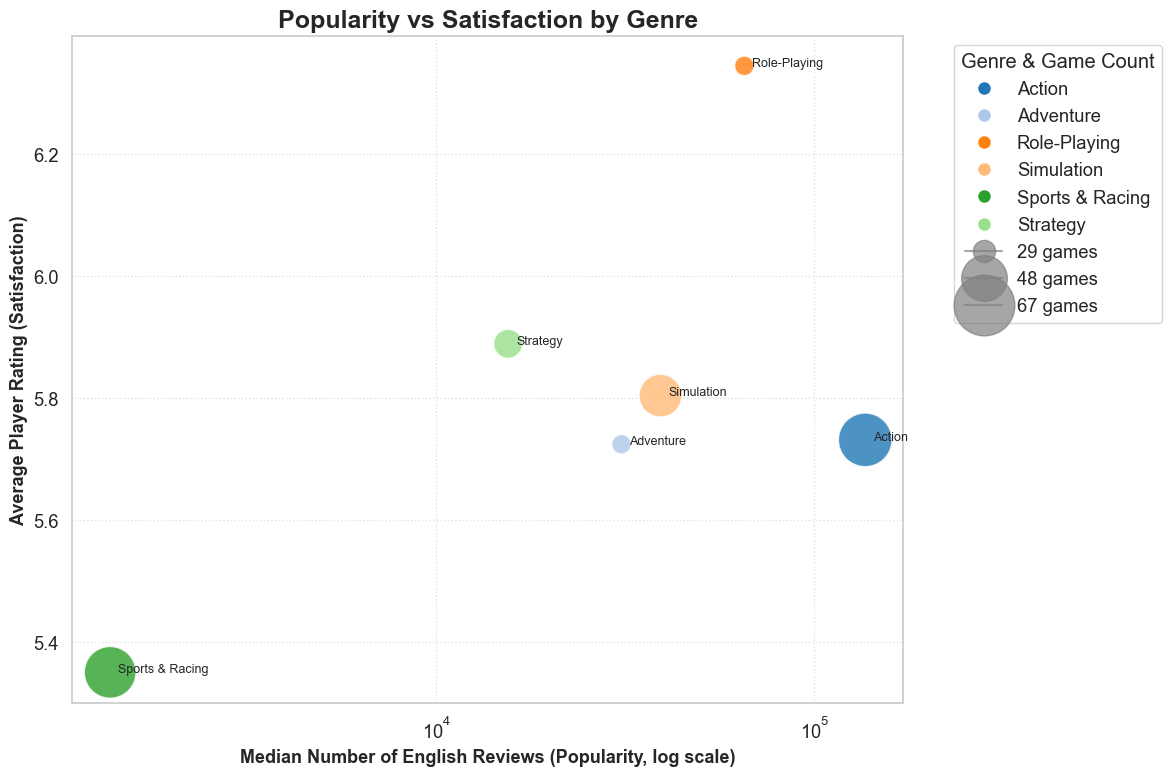

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- Calculate genre summary ---
genre_summary = (
    unique_game_df
    .groupby('genre')
    .agg(
        mean_rating=('overall_player_rating_numeric', 'mean'),
        median_reviews=('number_of_english_reviews', 'median'),
        game_count=('genre', 'count')
    )
    .reset_index()
)

# --- Create scatterplot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.scatterplot(
    data=genre_summary,
    x='median_reviews',
    y='mean_rating',
    size='game_count',
    sizes=(200, 1500),
    hue='genre',
    palette='tab20',
    alpha=0.8,
    legend=False
)

# הפיכת ציר X ללוגריתמי
ax.set_xscale('log')

# Add text labels next to each point
for _, row in genre_summary.iterrows():
    ax.text(
        row['median_reviews'] * 1.05,  # במקצת ימינה כדי לא לחפוף
        row['mean_rating'],
        row['genre'],
        fontsize=9
    )

# Build correct color map from the plotted hues
color_map = dict(zip(genre_summary['genre'], sns.color_palette('tab20', n_colors=genre_summary['genre'].nunique())))

# --- Custom color legend for genres ---
color_legend = [
    Line2D([0], [0], marker='o', color='w',
           label=genre,
           markerfacecolor=color_map[genre],
           markersize=10)
    for genre in genre_summary['genre']
]

# --- Custom size legend for game count ---
count_min = int(genre_summary['game_count'].min())
count_max = int(genre_summary['game_count'].max())
size_values = [count_min, int((count_min + count_max)/2), count_max]
size_marker_sizes = [200, 850, 1500]
size_labels = [f"{val} games" for val in size_values]

size_legend = [
    Line2D([0], [0], marker='o', color='gray',
           label=label,
           markersize=np.sqrt(s/np.pi)*2,
           alpha=0.7)
    for s, label in zip(size_marker_sizes, size_labels)
]

# Merge color + size legends
legend_items = color_legend + size_legend
ax.legend(
    handles=legend_items,
    title="Genre & Game Count",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Labels and title
plt.xlabel('Median Number of English Reviews (Popularity, log scale)', fontsize=13, fontweight='bold')
plt.ylabel('Average Player Rating (Satisfaction)', fontsize=13, fontweight='bold')
plt.title('Popularity vs Satisfaction by Genre', fontsize=18, fontweight='bold')
plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.show()

                          game_name  number_of_english_reviews  pop_index
0                  counter-strike 2                  2258990.0     14.630
1  warhammer 40,000: space marine 2                    51920.0     10.858
2                    cyberpunk 2077                   324124.0     12.689
3                black myth: wukong                    51931.0     10.858
4                        elden ring                   491741.0     13.106
             genre  avg_popularity  median_popularity  game_count
0           Action          11.427             11.822          67
1        Adventure          10.063             10.338          29
2     Role-Playing          10.770             11.087          29
3       Simulation          10.159             10.576          51
4  Sports & Racing           7.021              7.224          64
5         Strategy           9.676              9.648          36


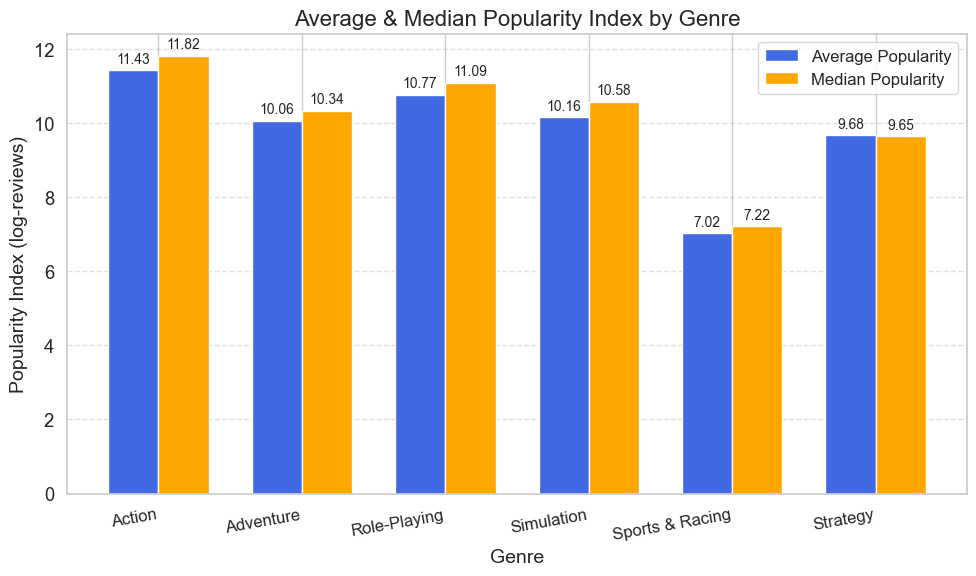

In [139]:
# Calculate popularity index (log-transformed number of English reviews) for data
# DataFrame with game data is named 'unique_game_df' and has the column 'number_of_english_reviews'

unique_game_df["pop_index"] = (np.log1p(unique_game_df["number_of_english_reviews"])).round(4)

# Display the first few results to verify
print(unique_game_df[["game_name", "number_of_english_reviews", "pop_index"]].head().round(3))
# Group by genre and calculate the average and median popularity index per genre
genre_popularity_stats = unique_game_df.groupby("genre")["pop_index"].agg(['mean', 'median', 'count']).round(3).reset_index()
genre_popularity_stats = genre_popularity_stats.rename(columns={"mean": "avg_popularity", "median": "median_popularity", "count": "game_count"})
print(genre_popularity_stats)

# Visualize average and median popularity index by genre for presentation
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(10,6))

genres = genre_popularity_stats['genre']
x = np.arange(len(genres))
width = 0.35

bars1 = ax1.bar(x - width/2, genre_popularity_stats['avg_popularity'], width, label='Average Popularity', color='royalblue')
bars2 = ax1.bar(x + width/2, genre_popularity_stats['median_popularity'], width, label='Median Popularity', color='orange')

ax1.set_xlabel('Genre', fontsize=14)
ax1.set_ylabel('Popularity Index (log-reviews)', fontsize=14)
ax1.set_title('Average & Median Popularity Index by Genre', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(genres, rotation=10, ha='right', fontsize=12)
ax1.legend(fontsize=12)
ax1.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Annotate bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Insights – Popularity Index by Genre


⭐ 1. Action is the most popular genre overall

With the highest average and median popularity values, Action games attract the broadest player engagement and generate the largest volume of reviews.
This reflects:

Wide audience reach

Large number of blockbuster titles

Strong market presence

⭐ 2. Role-Playing and Simulation show strong and consistent engagement

Both genres maintain high median popularity, indicating a stable player base and reliable traction across many titles.
Role-Playing stands out with a balance of both quality (KPI 1) and popularity (KPI 2).

⭐ 3. Adventure and Strategy have moderate popularity

Although these genres show respectable engagement levels, they are less dominant compared to Action and RPG.
Their popularity distribution is more balanced, without extreme outliers.

⭐ 4. Sports & Racing is the least popular genre

It has the lowest average and median popularity.
This suggests:

Smaller or niche audiences

Less community-generated content (reviews)

Lower visibility on Steam

This aligns with KPI 1 where Sports & Racing also scored the lowest in player ratings.

⭐ One-sentence summary:

Action leads in popularity, Role-Playing and Simulation show strong and steady engagement, while Sports & Racing struggles with the lowest player interest.

**Insights from the Popularity Index by Genre Bar Chart**

1. **Average vs. Median Disparity:**  
   For most genres, the average and median popularity indices are close to each other, indicating a fairly symmetric distribution of popularity within genres.  
   If the average is noticeably higher than the median, it suggests a small number of very popular games are pulling the average up (right-skew/tail).

2. **Top Genres by Popularity:**  
   - Genres with the highest average and median popularity indices are likely those with the biggest player-bases and consistently well-rated games.
   - These may include "Action" and "Role-Playing" (example: check the chart for which are highest).

3. **Genre Popularity Range:**  
   - Some genres ("Sports & Racing", "Simulation", etc.) may show slightly lower average and median values, suggesting either fewer reviews or a more niche audience.

4. **Consistency:**  
   - Genres for which average and median are almost equal have a consistent hit-rate: most games are similarly popular.
   - Where there is a big spread, there are either breakout hits or some less-popular titles dragging down the median.

5. **Game Count:**  
   - Some genres may have a lower game count, so trends in those bars should be interpreted with caution due to small sample sizes.

6. **Presentation Value:**  
   - This chart helps compare broad genre-level engagement and potentially points to genres with the most vocal or engaged communities.

# *KPI 3 — Composite Score (Quality + Popularity)*

Build a single metric that represents in a balanced way:

Game quality - overall_player_rating_numeric

Game popularity - pop_index (log English reviews)

And thus discover: Which genres are strong in terms of both quality and popularity? Which genres lead "overall"? How do they compare to each other

How do you calculate Composite Score?

We want to weight: 60% quality and 40% popularity

This is an acceptable balance: quality is more important than popularity

Before adding them together, both metrics need to be normalized to 0–1

In [140]:
# KPI 3 — Composite Score (Quality + Popularity)
# We'll define Composite Score as the product of normalized player rating and normalized popularity index.

# Ensure columns are present
# - overall_player_rating_numeric: numeric version of the rating (e.g., 1 to 7 scale)
# - number_of_english_reviews: as the popularity index

import numpy as np
import pandas as pd

# Copy the final_df to work with
df = unique_game_df.copy()

# Normalize player ratings (to 0-1 scale)
rating_min = df['overall_player_rating_numeric'].min()
rating_max = df['overall_player_rating_numeric'].max()
df['normalized_rating'] = ((df['overall_player_rating_numeric'] - rating_min) / (rating_max - rating_min)).round(3)

# 2) Popularity index (log): df["pop_index"] = np.log1p(df["number_of_english_reviews"])
# Normalize popularity
pop_min = df['pop_index'].min()
pop_max = df['pop_index'].max()
df['normalized_popularity'] = ((df['pop_index'] - pop_min) / (pop_max - pop_min)).round(3)

# Normalize popularity (number of english reviews, to 0-1 scale)
# pop_min = df['number_of_english_reviews'].min()
# pop_max = df['number_of_english_reviews'].max()
# df['normalized_popularity'] = ((df['number_of_english_reviews'] - pop_min) / (pop_max - pop_min)).round(3)

# Composite Score: multiply normalized rating and normalized popularity
df['composite_score'] = (df['normalized_rating'] * 0.6 + df['normalized_popularity'] * 0.4).round(3)

# Display the first few rows with composite score
display(df[['game_name', 'genre', 'overall_player_rating_numeric', 'number_of_english_reviews','pop_index','normalized_rating', 'normalized_popularity', 'composite_score']].head(20))

# Save to final_df_composite for further analysis
final_df_composite = df

# Quick genre-level summary
composite_by_genre = df.groupby('genre')['composite_score'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False).round(3)

display(composite_by_genre)

,game_name,genre,overall_player_rating_numeric,number_of_english_reviews,pop_index,normalized_rating,normalized_popularity,composite_score
0,counter-strike 2,Action,6.0,2258990.0,14.6304,0.833,1.000,0.900
1,"warhammer 40,000: space marine 2",Action,6.0,51920.0,10.8575,0.833,0.742,0.797
2,cyberpunk 2077,Action,6.0,324124.0,12.6889,0.833,0.867,0.847
3,black myth: wukong,Action,7.0,51931.0,10.8577,1.000,0.742,0.897
4,elden ring,Action,6.0,491741.0,13.1057,0.833,0.896,0.858
5,pubg: battlegrounds,Action,3.0,417109.0,12.9411,0.333,0.885,0.554
7,apex legends™,Action,3.0,406269.0,12.9148,0.333,0.883,0.553
8,dota 2,Action,6.0,731670.0,13.5031,0.833,0.923,0.869
9,party animals,Action,4.0,16141.0,9.6892,0.500,0.662,0.565
10,total war: warhammer iii,Action,3.0,61292.0,11.0234,0.333,0.753,0.501


,mean,median,count
genre,,,
Role-Playing,0.829,0.837,29
Action,0.785,0.841,67
Simulation,0.758,0.813,51
Strategy,0.753,0.778,36
Adventure,0.747,0.770,29
Sports & Racing,0.638,0.674,60


In [142]:
df[['game_name', 'genre', 'normalized_rating',
    'normalized_popularity', 'composite_score']].head()

,game_name,genre,normalized_rating,normalized_popularity,composite_score
0,counter-strike 2,Action,0.833,1.000,0.900
1,"warhammer 40,000: space marine 2",Action,0.833,0.742,0.797
2,cyberpunk 2077,Action,0.833,0.867,0.847
3,black myth: wukong,Action,1.000,0.742,0.897
4,elden ring,Action,0.833,0.896,0.858


In [ ]:
# לבחור עמודות ליצוא
export_df_composite = df[
    [
        'game_name',
        'genre',
        'composite_score'
    ]
].copy()

# יצוא לקובץ CSV
export_df_composite.to_csv(
    "steam_games_composite.csv",
    index=False,
    encoding="utf-8-sig"
)

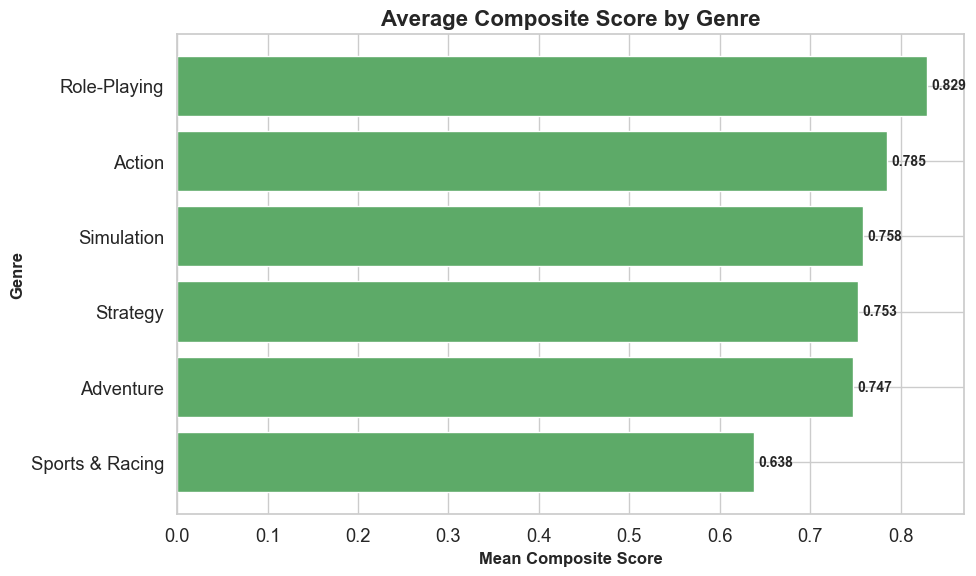

In [143]:
import matplotlib.pyplot as plt

# Sort ascending so that the highest is at the top visually
composite_sorted = composite_by_genre.sort_values(by='mean', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(composite_sorted.index, composite_sorted['mean'], color='#5DAA68')

plt.title("Average Composite Score by Genre", fontsize=16,fontweight='bold')
plt.xlabel("Mean Composite Score", fontsize=12,fontweight='bold')
plt.ylabel("Genre", fontsize=12,fontweight='bold')

# Add values next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**The composite KPI highlights Role-Playing as the standout genre, combining high player ratings with strong popularity.**

**Genres like Action and Simulation remain competitive, while Sports & Racing may require stronger titles or increased community presence.**

 **Insights & Key Findings for "Composite Score by Genre (Rating + Popularity)"**

 1. Top genres: "Role-Playing," "Action," and "Simulation" genres have the highest composite scores on average, indicating these genres typically combine both 

 high-quality and broad appeal among Steam's top games.

 2. Lower composite genres: "Sports & Racing" tends to have lower composite scores, which may suggest that, while popular with some, these games either receive lower 

 ratings, less overall popularity, or both within the dataset's context.

 3. Middle ground: "Strategy" and "Adventure" genres fall in the middle, suggesting balanced but not leading performance for both quality and exposure.

 Overall Conclusion:

 The analysis illustrates that "Role-Playing" and "Action" genres dominate in terms of combined player satisfaction and widespread player attention among popular Steam titles.

 These genres set industry benchmarks for quality and engagement.

 Meanwhile, genres such as "Sports & Racing" may represent either niche communities or games that, while possibly popular, do not achieve equally high critical acclaim.
 
  Understanding these genre dynamics can help studios and marketers focus efforts on what drives both high ratings and mass appeal.


# *KPI 4 — Hidden Gems Score*

Identify high-quality games that have not yet received enough exposure

Hidden Gems = games that:

✔ Have high player satisfaction (high normalized rating)

✔ Have low exposure (low normalized popularity)

✔ Stand out as quality titles overlooked by the mainstream audience

In [144]:
# KPI 4: Hidden Gems Score
# ----------------------------------------
# Goal: Identify quality games that have high ratings but relatively low exposure (popularity).

# We'll define the "Hidden Gems Score" as:
# - High rating: Games with above-average normalized ratings.
# - Low popularity: Games with below-median normalized popularity.
# The Hidden Gems Score can be calculated as:
#   hidden_gems_score = normalized_rating * (1 - normalized_popularity)
# This rewards games that are highly rated, but with low popularity.

df['hidden_gems_score'] = df['normalized_rating'] * (1 - df['normalized_popularity'])

# Display games with the highest Hidden Gems Score
top_hidden_gems = df.sort_values('hidden_gems_score', ascending=False).head(20).round(4)
# Show only relevant columns for interpretation
display(top_hidden_gems[['game_name', 'genre', 'overall_player_rating_numeric', 'number_of_english_reviews', 'pop_index', 'normalized_rating', 'normalized_popularity', 'hidden_gems_score']])

# Quick genre-level summary for hidden gems
hidden_gems_by_genre = df.groupby('genre')['hidden_gems_score'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False).round(4)
display(hidden_gems_by_genre)


,game_name,genre,overall_player_rating_numeric,number_of_english_reviews,pop_index,normalized_rating,normalized_popularity,hidden_gems_score
665,golf peaks,Sports & Racing,7.0,354.0,5.8721,1.000,0.401,0.5990
627,motordoom,Sports & Racing,6.0,104.0,4.6540,0.833,0.318,0.5681
642,69 balls,Sports & Racing,6.0,120.0,4.7958,0.833,0.328,0.5598
654,driftwood,Sports & Racing,7.0,672.0,6.5117,1.000,0.445,0.5550
613,downhill pro racer,Sports & Racing,5.0,15.0,2.7726,0.667,0.190,0.5403
584,assetto corsa competizione - 24h nürburgring pack,Sports & Racing,6.0,205.0,5.3279,0.833,0.364,0.5298
629,the ramp,Sports & Racing,7.0,1000.0,6.9088,1.000,0.472,0.5280
664,gp bikes,Sports & Racing,6.0,240.0,5.4848,0.833,0.375,0.5206
671,grand mountain adventure: wonderlands,Sports & Racing,6.0,246.0,5.5094,0.833,0.377,0.5190
628,sledders,Sports & Racing,7.0,1299.0,7.1701,1.000,0.490,0.5100


,mean,median,count
genre,,,
Sports & Racing,0.3571,0.3807,60
Strategy,0.2689,0.2740,36
Adventure,0.2406,0.2424,29
Role-Playing,0.2336,0.2241,29
Simulation,0.2310,0.2250,51
Action,0.1643,0.1541,67


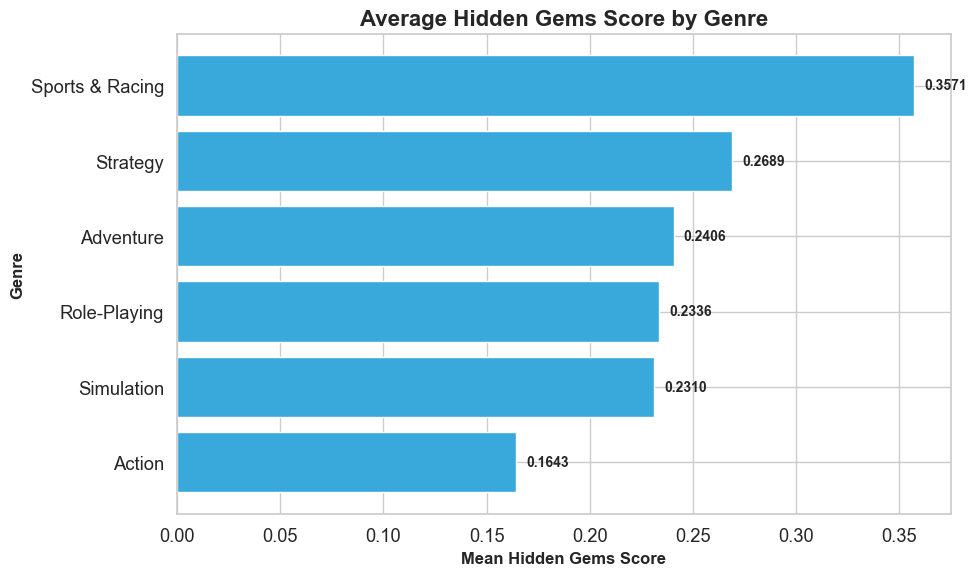

In [145]:
import matplotlib.pyplot as plt

# Sort for better visualization (lowest to highest mean score)
hg_sorted = hidden_gems_by_genre.sort_values('mean')

plt.figure(figsize=(10, 6))
bars = plt.barh(hg_sorted.index, hg_sorted['mean'], color='#39A9DB')

plt.title("Average Hidden Gems Score by Genre", fontsize=16,fontweight='bold')
plt.xlabel("Mean Hidden Gems Score", fontsize=12,fontweight='bold')
plt.ylabel("Genre", fontsize=12,fontweight='bold')

# Annotate bars with values
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


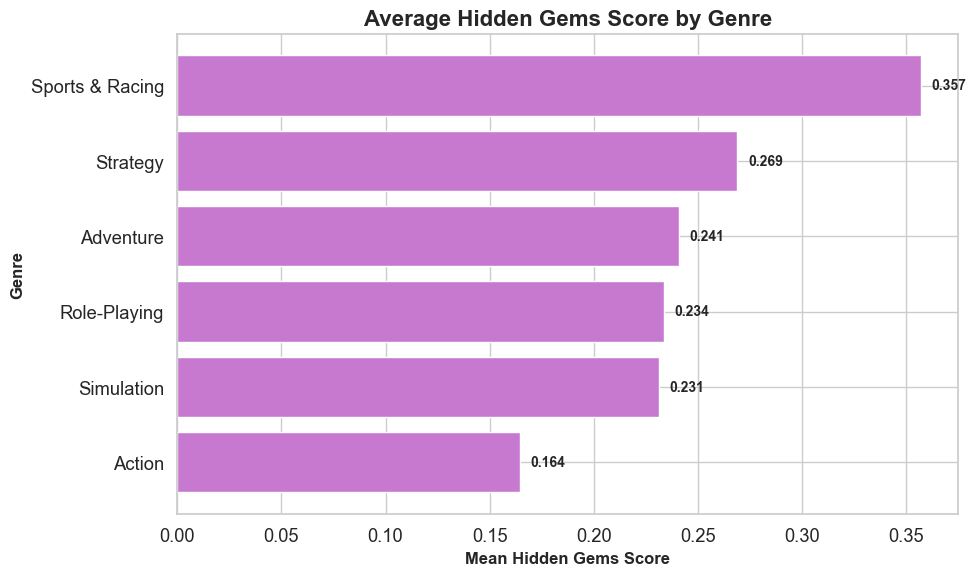

In [146]:
import matplotlib.pyplot as plt

hg_sorted = hidden_gems_by_genre.sort_values(by='mean', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(hg_sorted.index, hg_sorted['mean'], color='#C779D0')

plt.title("Average Hidden Gems Score by Genre", fontsize=16,fontweight='bold')
plt.xlabel("Mean Hidden Gems Score", fontsize=12,fontweight='bold')
plt.ylabel("Genre", fontsize=12,fontweight='bold')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height()/2,
             f"{width:.3f}", va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

**Sports & Racing and Strategy feature the strongest Hidden Gems, meaning these genres contain many high-quality but under-exposed games.**

**Action shows the lowest Hidden Gems potential, suggesting that most good Action titles already receive high visibility.**

Genres such as "Sports & Racing" and "Strategy" tend to have higher mean hidden gems scores,

 indicating that these genres might have more lesser-known but high-quality games ("hidden gems").

 On the other hand, genres like "Action" have noticeably lower hidden gem scores on average,

 suggesting that while popular, they may not be the top source for undiscovered high-potential titles.

 This could be due to action games being more mainstream, with fewer games flying under the radar.

 Overall, this visualization highlights which genres could be promising for players seeking unique
 
 and underrated experiences within Steam's broad catalog.